# The Problem Statement 

BigMart wants to know the properties of the product and stores which sell them which plays the main role in incresing the sales. So they have collected 2013 sales data  for 1559 producs from 10 stores from different cities to predict which store acheives the highest percentage of sales and which product exactly in it.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

# Loading the data

In [2]:
# Load the train dataset
df_train = pd.read_csv('Train.csv')
df_train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [3]:
# Load the test dataset
df_test = pd.read_csv('Test.csv')
df_test.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

# Data Structure and content

## Train Dataframe

In [4]:
# To know the size of the train dataframe
df_train.shape   

(8523, 12)

> __The train dataset cosists of 8523 record and 12 feature.__

In [5]:
# The statistical summary of numerical columns in train dataset
df_train.describe() 

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [6]:
# To know some info about each feature in the dataframe ( number of non-null values , datatype of the feature )
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# To get the number of null values in each feature ( missing values )
df_train.isna().sum()    

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

> __There are missing values in Item_Weight & Outlet_Size features  in the test dataframe.__

## Test Dataframe

In [8]:
# To know the size of the test dataframe
df_test.shape   

(5681, 11)

> __The test dataset cosists of 5681 records and 11 features.__

In [9]:
# The statistical summary of numerical columns in test dataset
df_test.describe() 

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412000                1987.000000
50%      12.500000         0.054154   141.415400                1999.000000
75%      16.700000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000

In [10]:
# To know some info about each feature in the dataframe ( number of non-null values , datatype of the feature )
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [11]:
# To get the number of null values in each feature ( missing values )
df_test.isna().sum()    

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

> __There are missing values in Item_Weight & Outlet_Size features in the test dataframe.__

### Information About The Data

Header | Data Type | Definition
---|---------|---------
`Item_Identifier`| object | The id which identifies each product in each store
`Item_Weight` | float64 |   The product weight
`Item_Fat_Content` | object |  The ammount of fat in the product
`Item_Visibility`| float64 | The percentage of total display area in a store that is dedicated to displaying a particular product
`Item_Type`| object | The product belongs to which category of food
`Item_MRP` | float64 | The maximum retail price of a product.( the maximum price that can be charged for a product by a seller. )
`Outlet_Identifier` | object | The id which identifies each store
`Outlet_Establishment_Year`| int64 |  The yaer in which the store were built
`Outlet_Size` | object |  The size of the store
`Outlet_Location_Type` | object | The type of location in which the store exists
`Outlet_Type` | object  |  The store type 
`Item_Outlet_Sales`| float64 |   The sales of the product in the store






## Data Visualization

### CATEGORICAL VALUES ( Train Dataframe )

In [12]:
# To get the categorical features in the dataframe 
train_categoric_features = df_train.select_dtypes(include=np.object)
train_categoric_columns= train_categoric_features.columns
train_categoric_features = list(train_categoric_columns) 
print ( " The train dataframe contains 7 categorical features which are : " )
print(train_categoric_features)

 The train dataframe contains 7 categorical features which are : 
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [13]:
# To get the number of unique categories in each feature
for feature in train_categoric_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df_train[feature].unique())))

The feature is Item_Identifier and number of categories are 1559
The feature is Item_Fat_Content and number of categories are 5
The feature is Item_Type and number of categories are 16
The feature is Outlet_Identifier and number of categories are 10
The feature is Outlet_Size and number of categories are 4
The feature is Outlet_Location_Type and number of categories are 3
The feature is Outlet_Type and number of categories are 4


#### The Count Plot Of Each Catagorical Feature

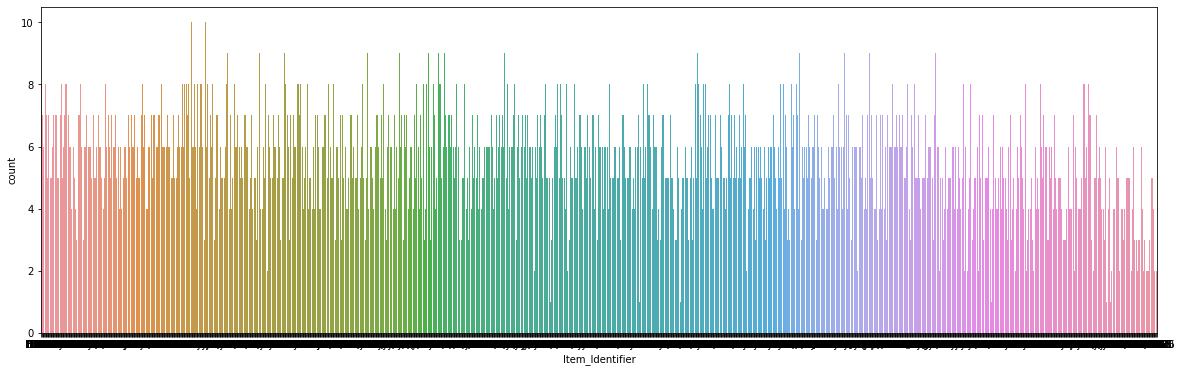

_______________________________________________________________________________________________________________________________


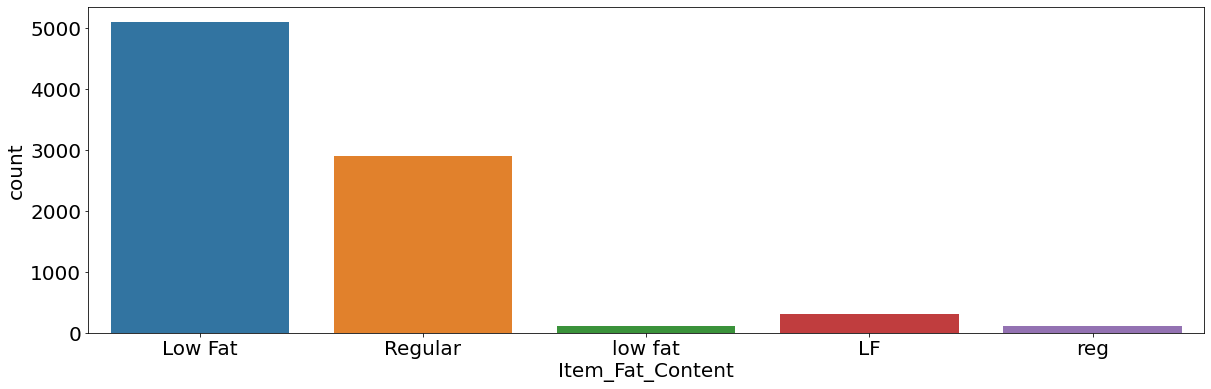

_______________________________________________________________________________________________________________________________


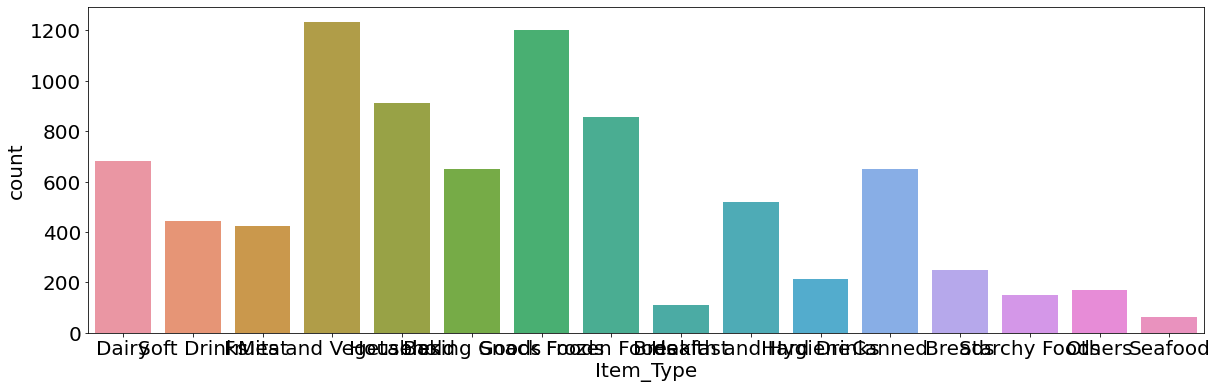

_______________________________________________________________________________________________________________________________


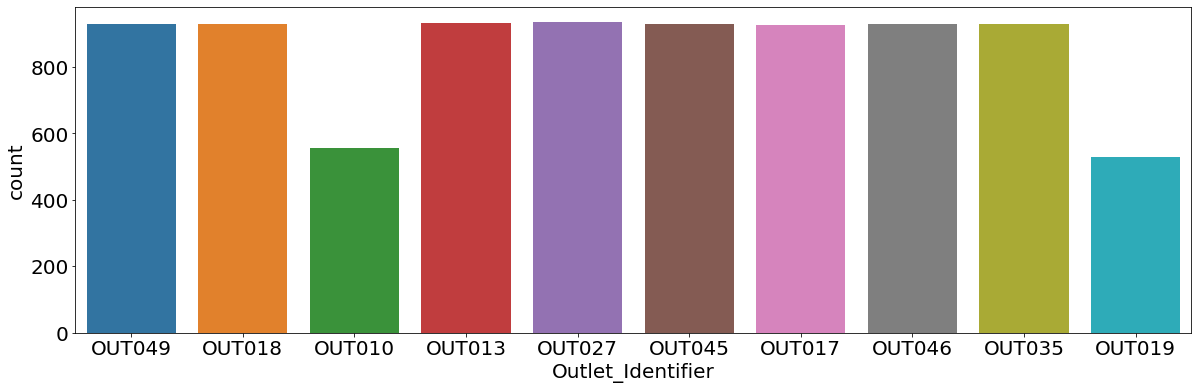

_______________________________________________________________________________________________________________________________


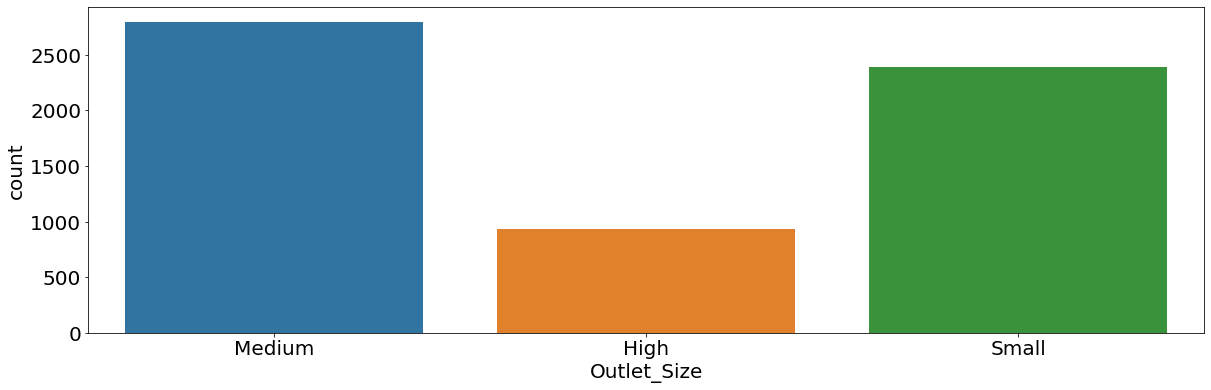

_______________________________________________________________________________________________________________________________


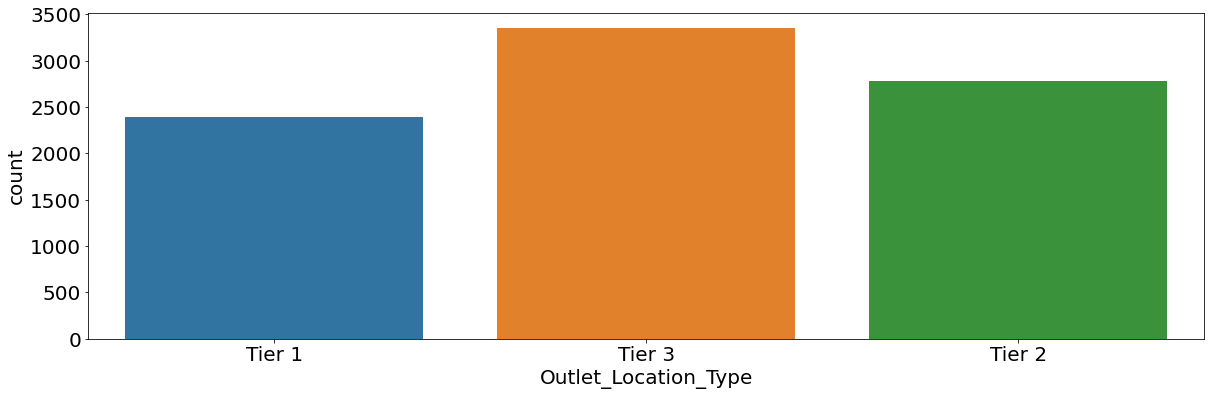

_______________________________________________________________________________________________________________________________


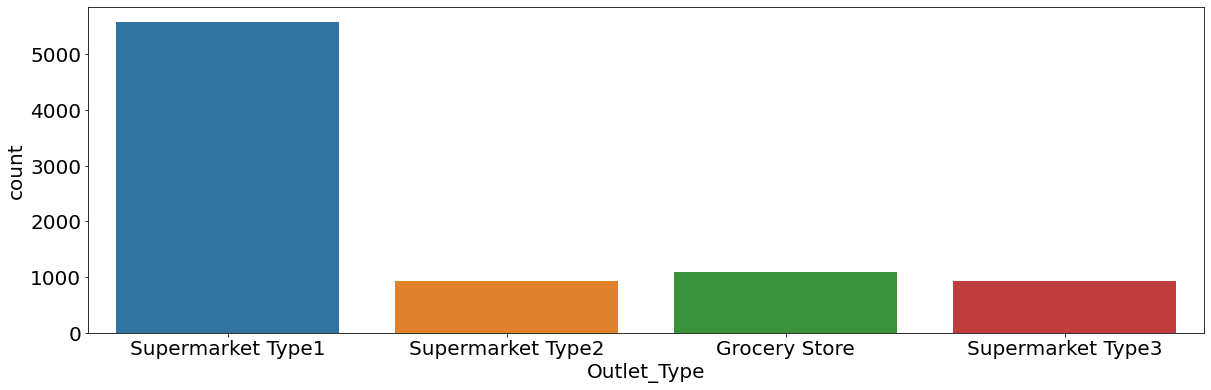

_______________________________________________________________________________________________________________________________


In [14]:
for feature in train_categoric_features : 
    fig = plt.subplots(figsize=(20, 6))
    plt.rcParams.update({'font.size': 20})
    data = df_train[feature].value_counts()
    countplot = sns.countplot(x=feature, data=df_train)
    plt.show()
    print("_______________________________________________________________________________________________________________________________")

#### The Pie Chart Of Each Catagorical Feature

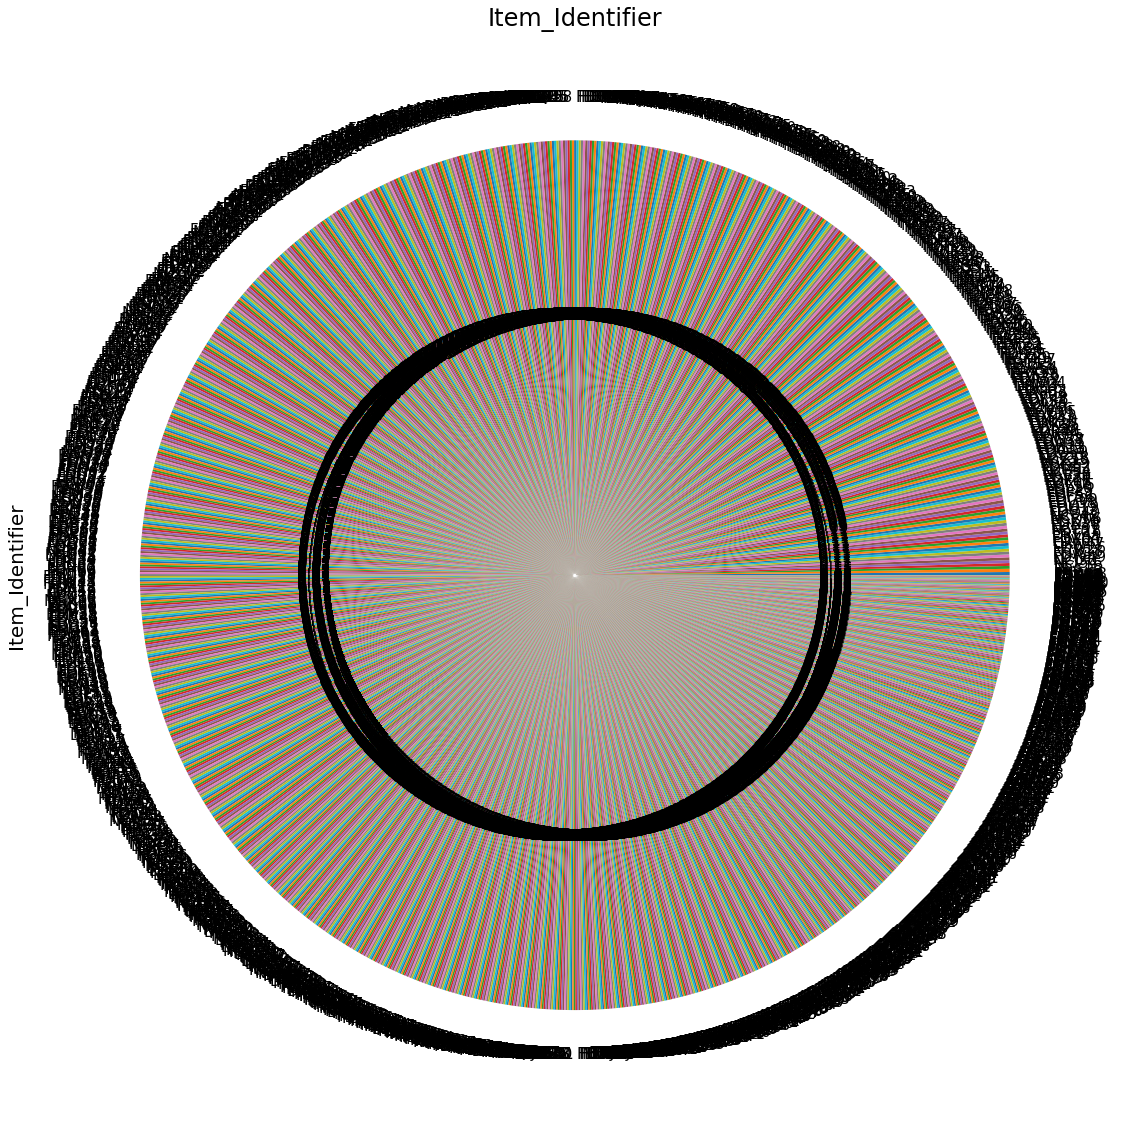

_______________________________________________________________________________________________________________________________


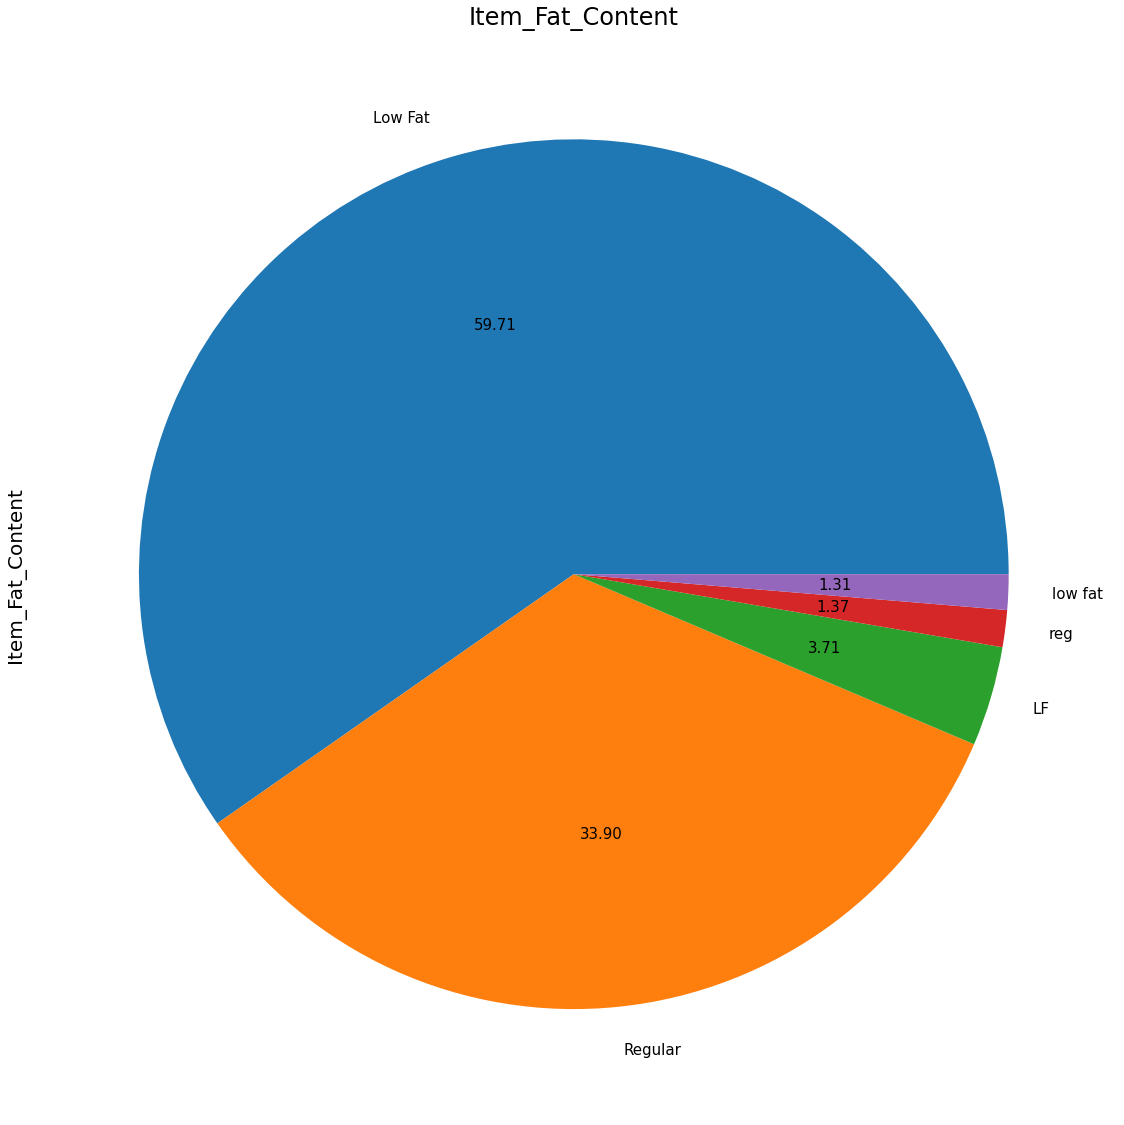

_______________________________________________________________________________________________________________________________


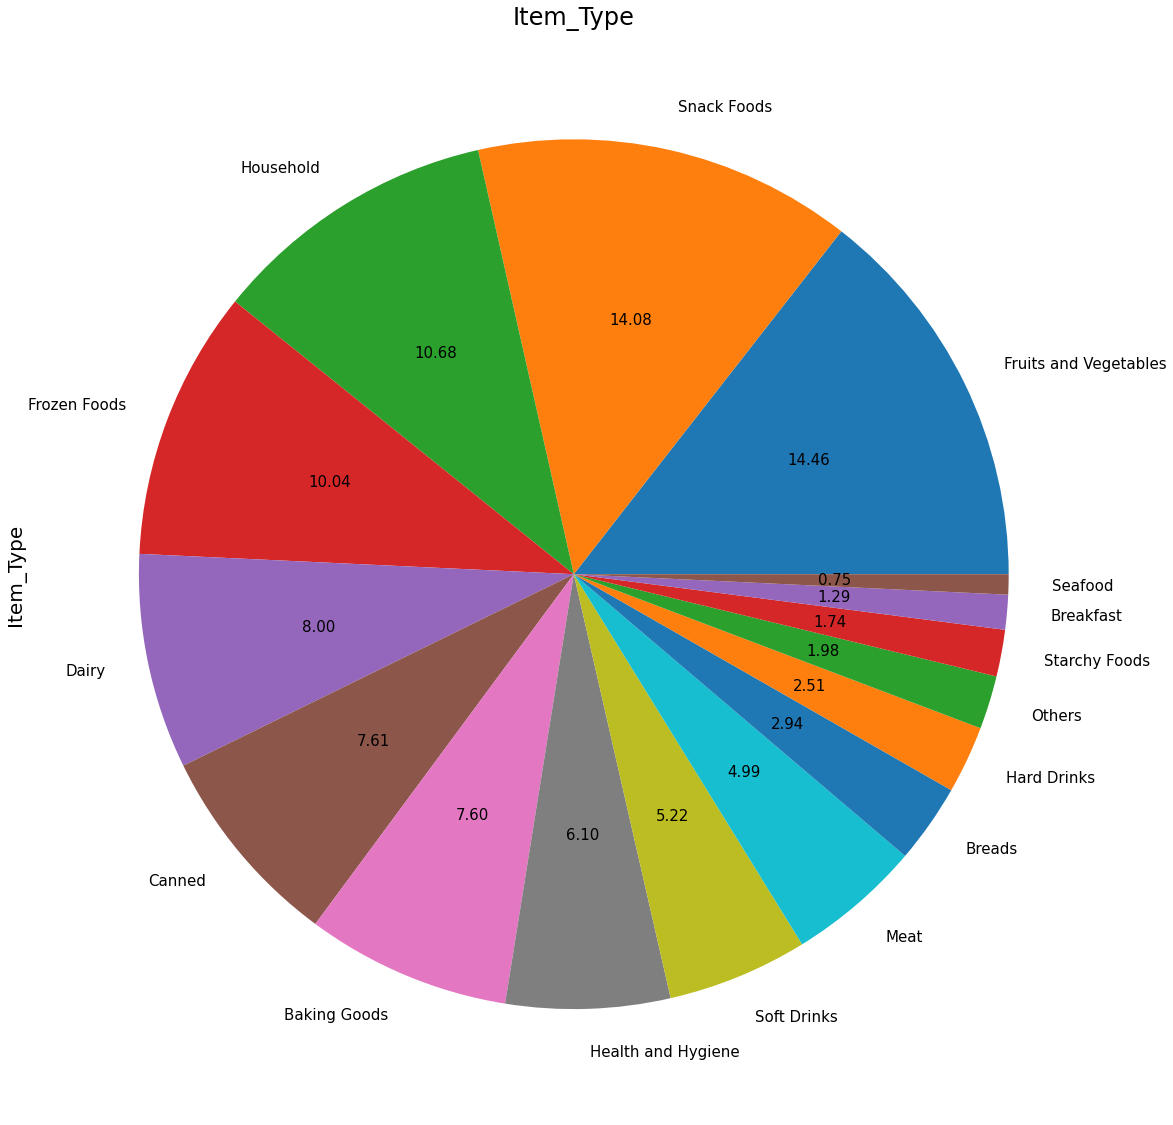

_______________________________________________________________________________________________________________________________


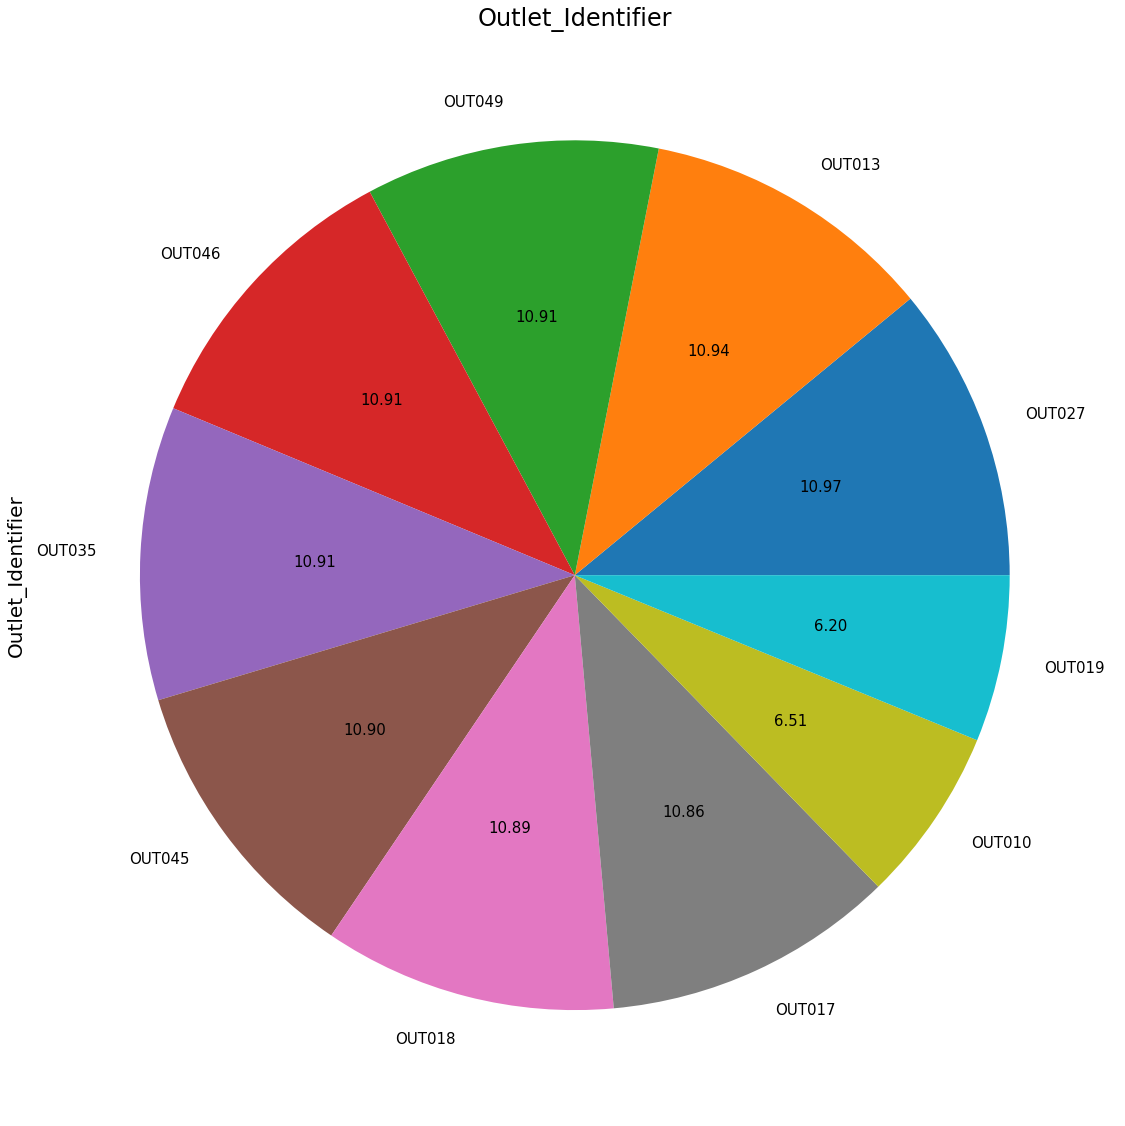

_______________________________________________________________________________________________________________________________


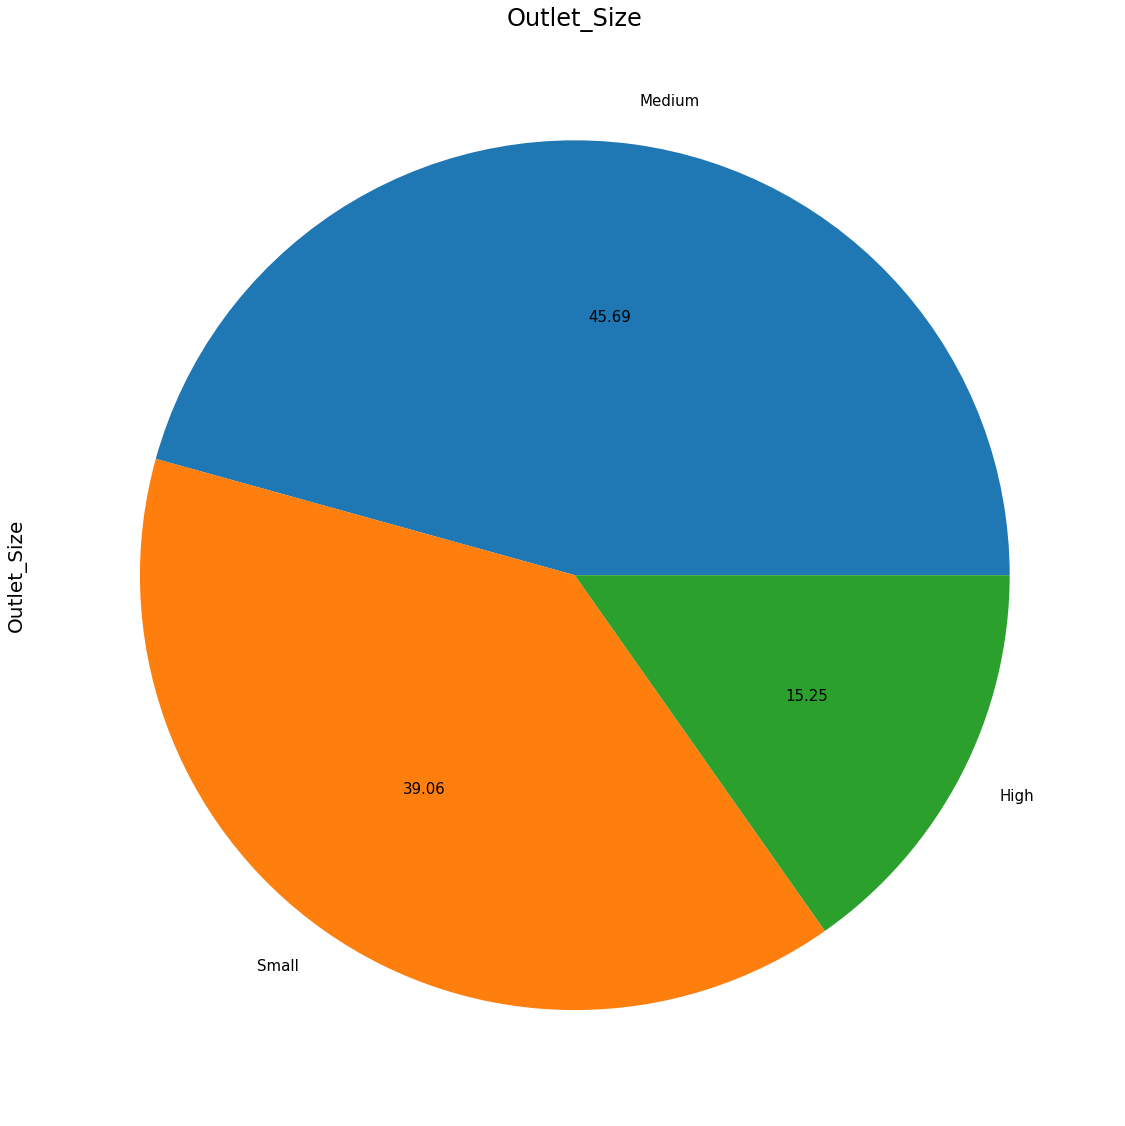

_______________________________________________________________________________________________________________________________


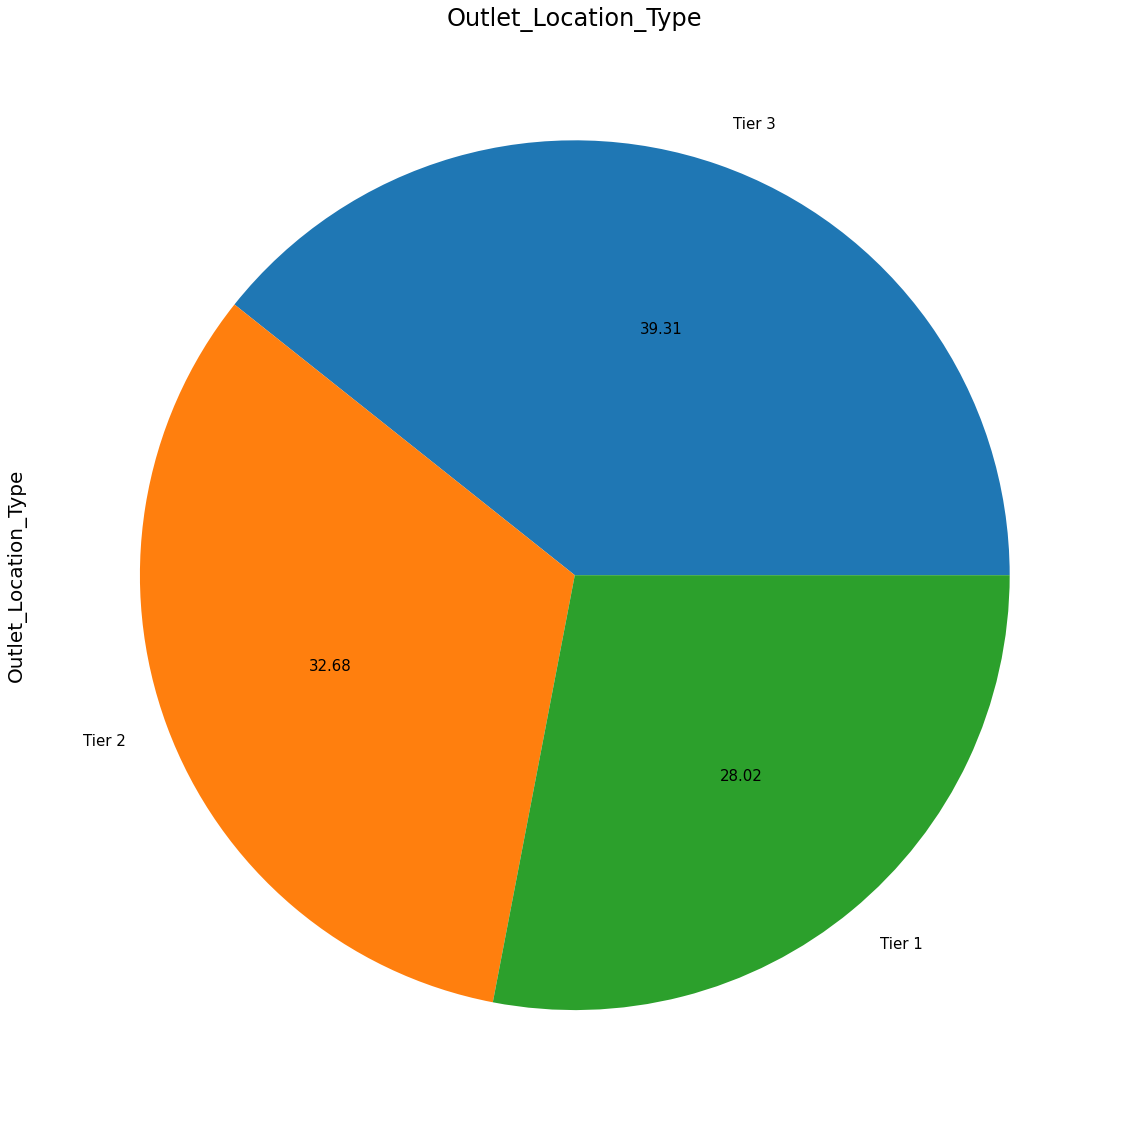

_______________________________________________________________________________________________________________________________


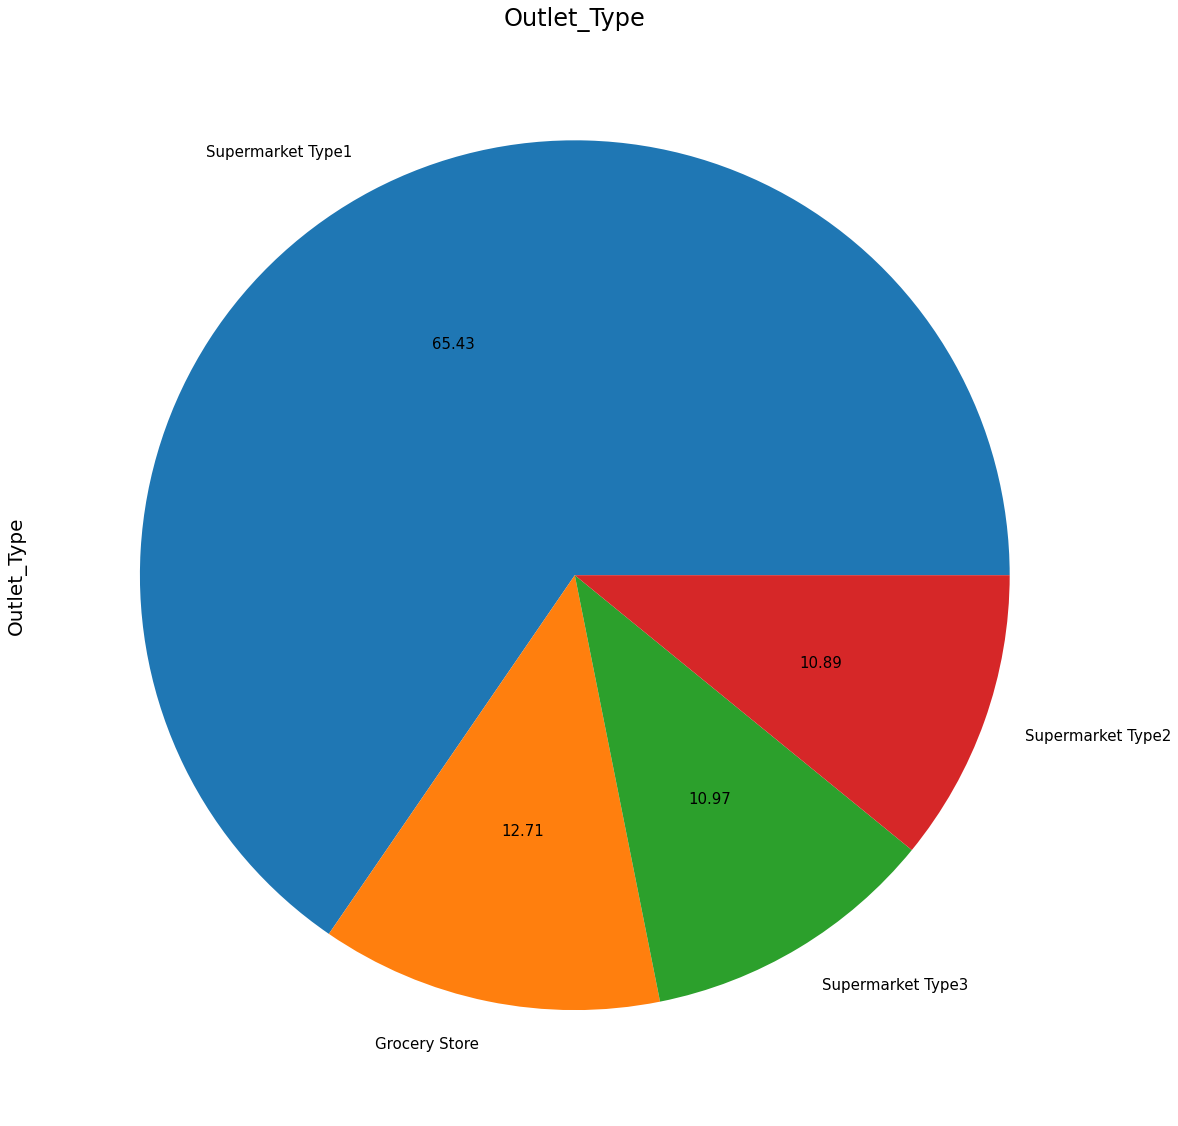

_______________________________________________________________________________________________________________________________


In [15]:
for feature in train_categoric_features: 
    fig = plt.subplots(figsize=(30, 20))
    plt.rcParams.update({'font.size': 20})
    data = df_train[feature].value_counts()
    barplot = data.plot(kind='pie',  title=feature, autopct="%.2f", fontsize=15)
    plt.show()
    print("_______________________________________________________________________________________________________________________________")

### NUMERICAL VALUES ( Train Dataframe )

In [16]:
# To get the nuumerical features in the dataframe 
train_numeric_features = df_train.select_dtypes(include=np.number)
train_numeric_columns= train_numeric_features.columns
train_numeric_features = list(train_numeric_columns) 
print ( " The train dataframe contains 5 numeric features which are : " )
print(train_numeric_features)

 The train dataframe contains 5 numeric features which are : 
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [17]:
# To get the number of unique values in each numerical feature
for feature in train_numeric_features:
    print('The feature is {} and number of unique values are {}'.format(feature,len(df_train[feature].unique())))

The feature is Item_Weight and number of unique values are 416
The feature is Item_Visibility and number of unique values are 7880
The feature is Item_MRP and number of unique values are 5938
The feature is Outlet_Establishment_Year and number of unique values are 9
The feature is Item_Outlet_Sales and number of unique values are 3493


### CATEGORICAL VALUES ( Test Dataframe )

In [18]:
# To get the categorical features in the dataframe 
test_categoric_features = df_test.select_dtypes(include=np.object)
test_categoric_columns= test_categoric_features.columns
test_categoric_features = list(test_categoric_columns) 
print ( " The train dataframe contains 7 categoric features which are : " )
print(test_categoric_features)

 The train dataframe contains 7 categoric features which are : 
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [19]:
# To get the number of unique categories in each feature
for feature in test_categoric_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df_test[feature].unique())))

The feature is Item_Identifier and number of categories are 1543
The feature is Item_Fat_Content and number of categories are 5
The feature is Item_Type and number of categories are 16
The feature is Outlet_Identifier and number of categories are 10
The feature is Outlet_Size and number of categories are 4
The feature is Outlet_Location_Type and number of categories are 3
The feature is Outlet_Type and number of categories are 4


#### The Count Plot Of Each Catagorical Feature

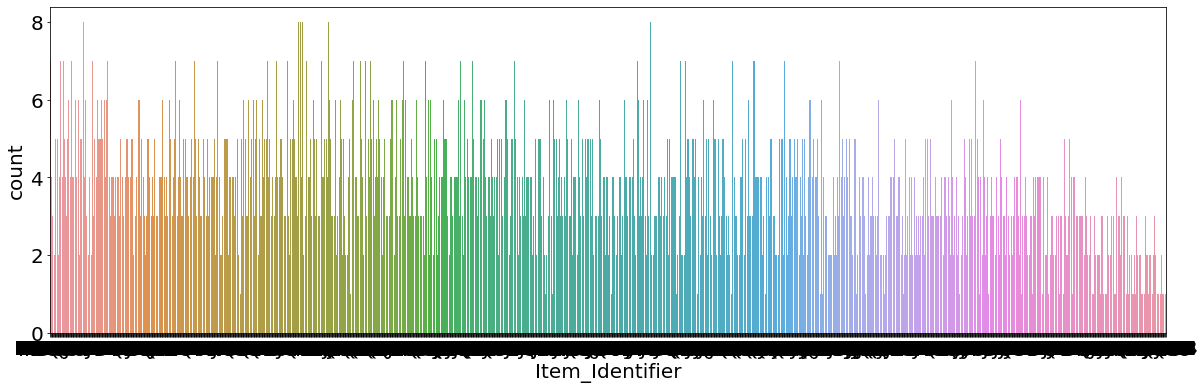

_______________________________________________________________________________________________________________________________


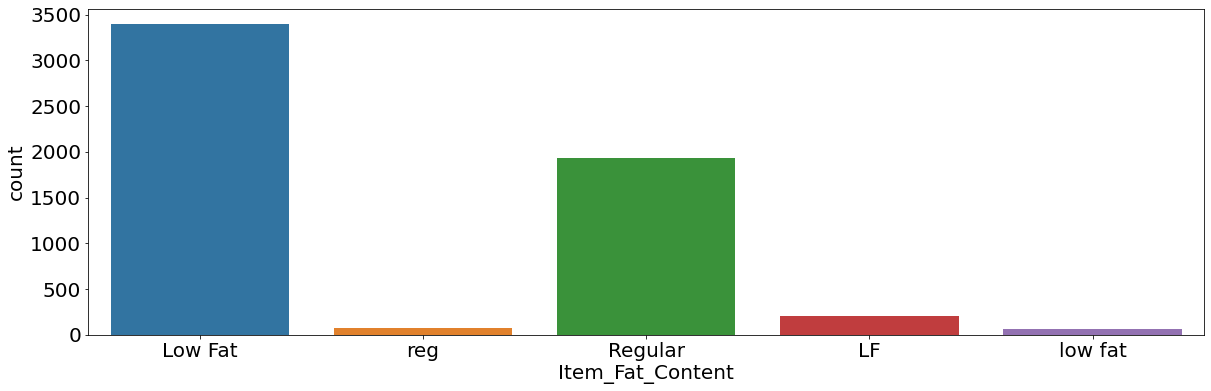

_______________________________________________________________________________________________________________________________


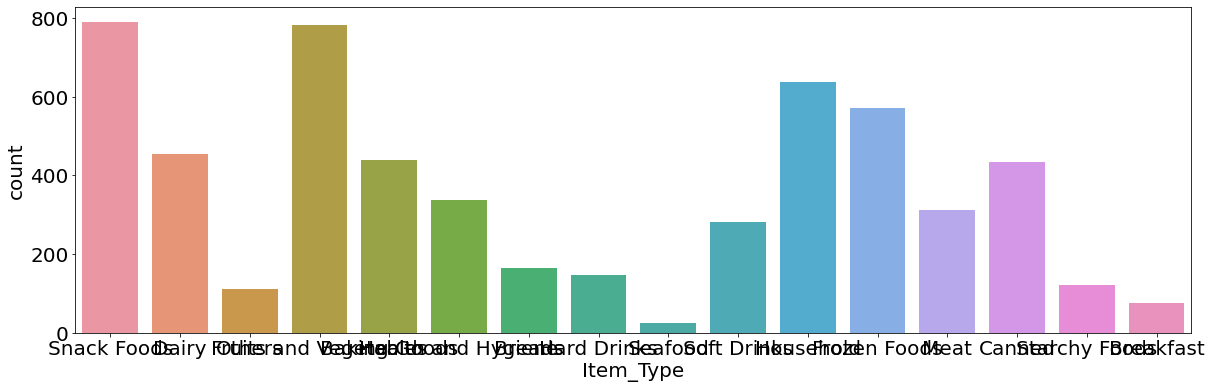

_______________________________________________________________________________________________________________________________


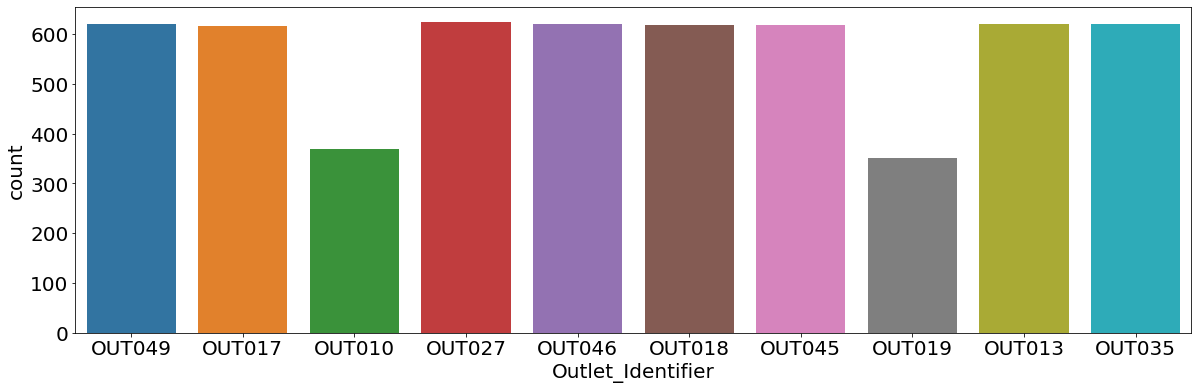

_______________________________________________________________________________________________________________________________


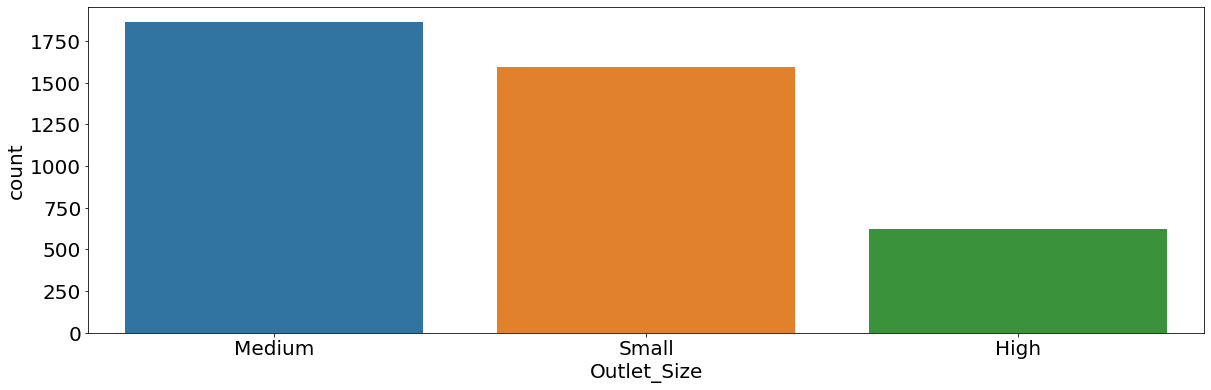

_______________________________________________________________________________________________________________________________


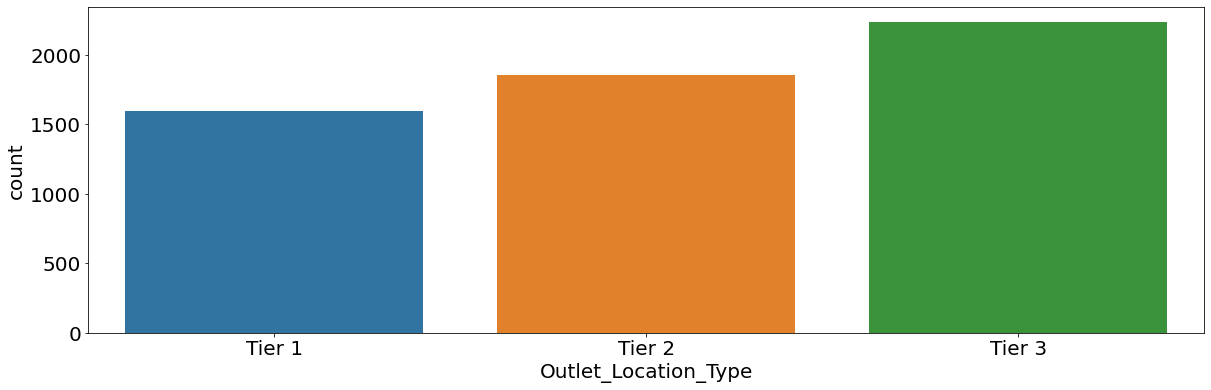

_______________________________________________________________________________________________________________________________


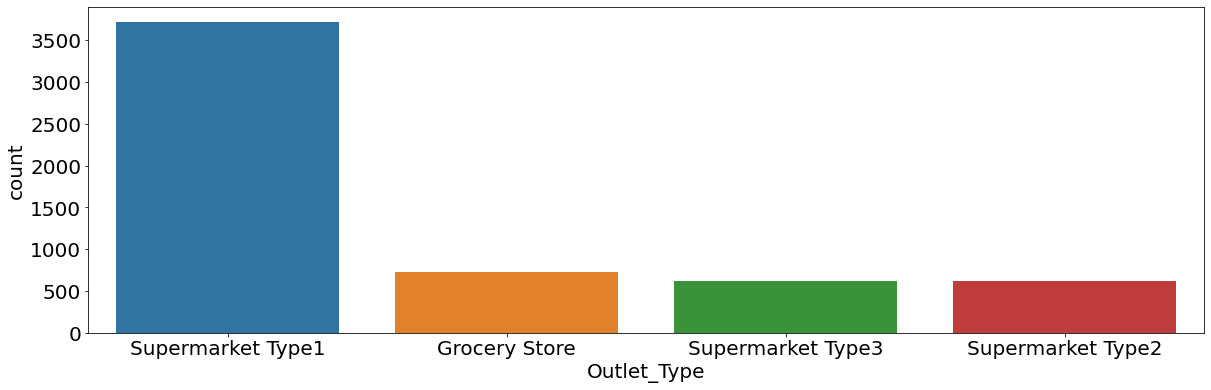

_______________________________________________________________________________________________________________________________


In [20]:
for feature in test_categoric_features : 
    fig = plt.subplots(figsize=(20, 6))
    plt.rcParams.update({'font.size': 20})
    data = df_test[feature].value_counts()
    countplot = sns.countplot(x=feature, data=df_test)
    plt.show()
    print("_______________________________________________________________________________________________________________________________")

#### The Pie Chart Of Each Catagorical Feature

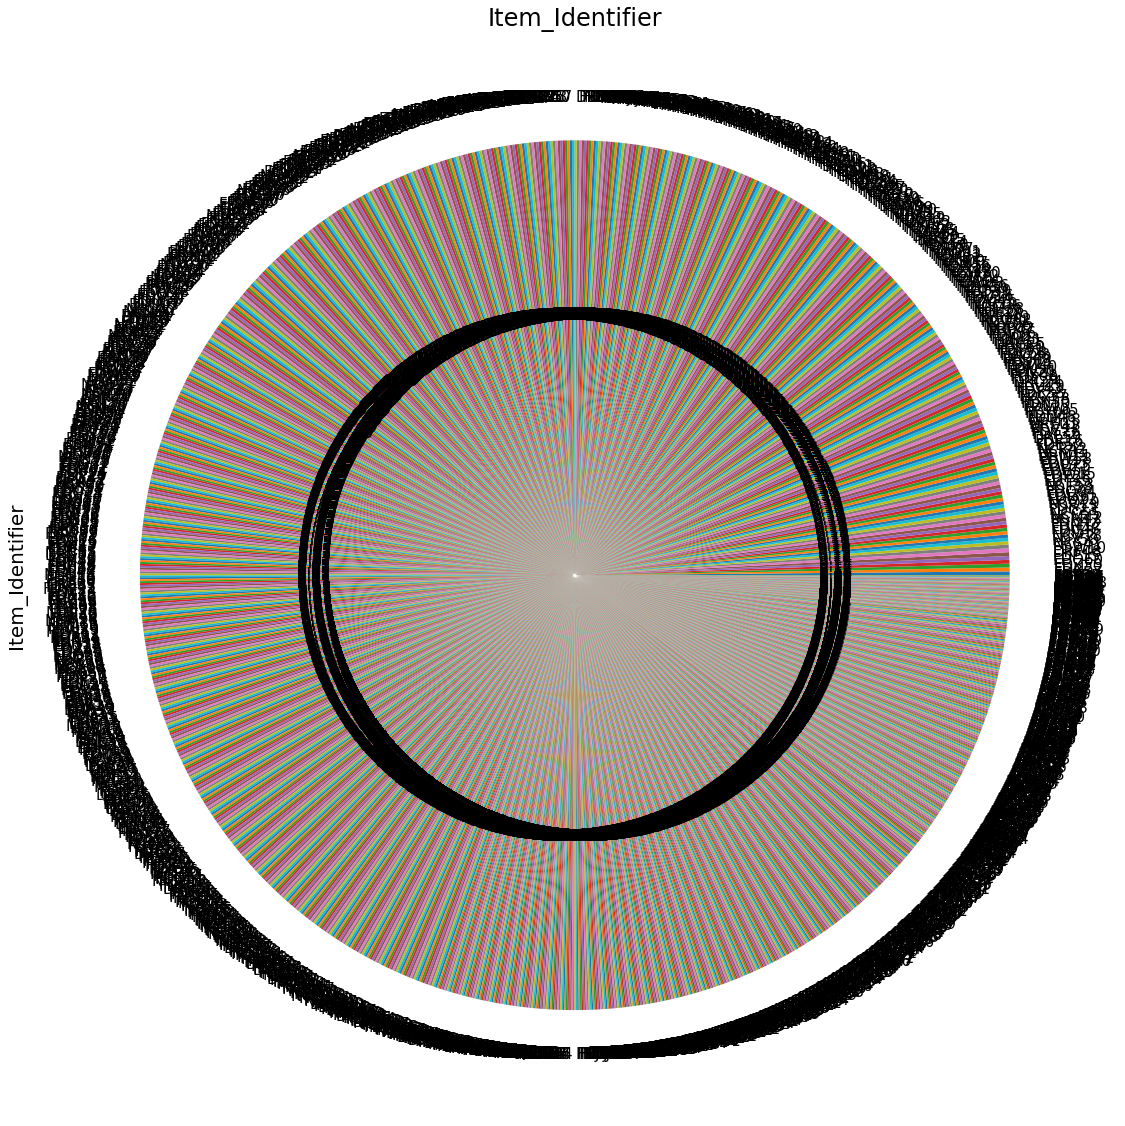

_______________________________________________________________________________________________________________________________


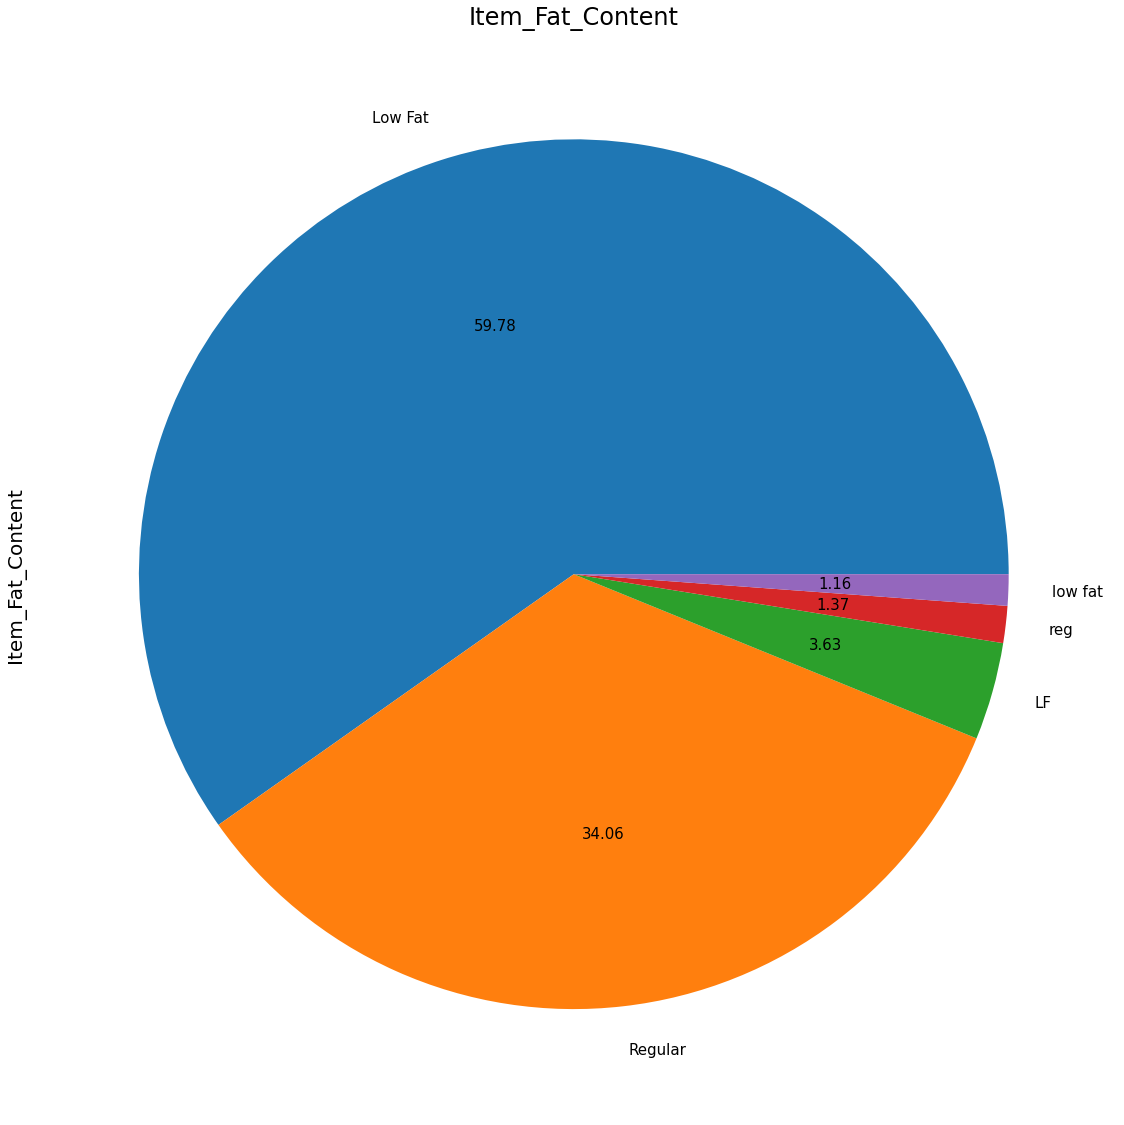

_______________________________________________________________________________________________________________________________


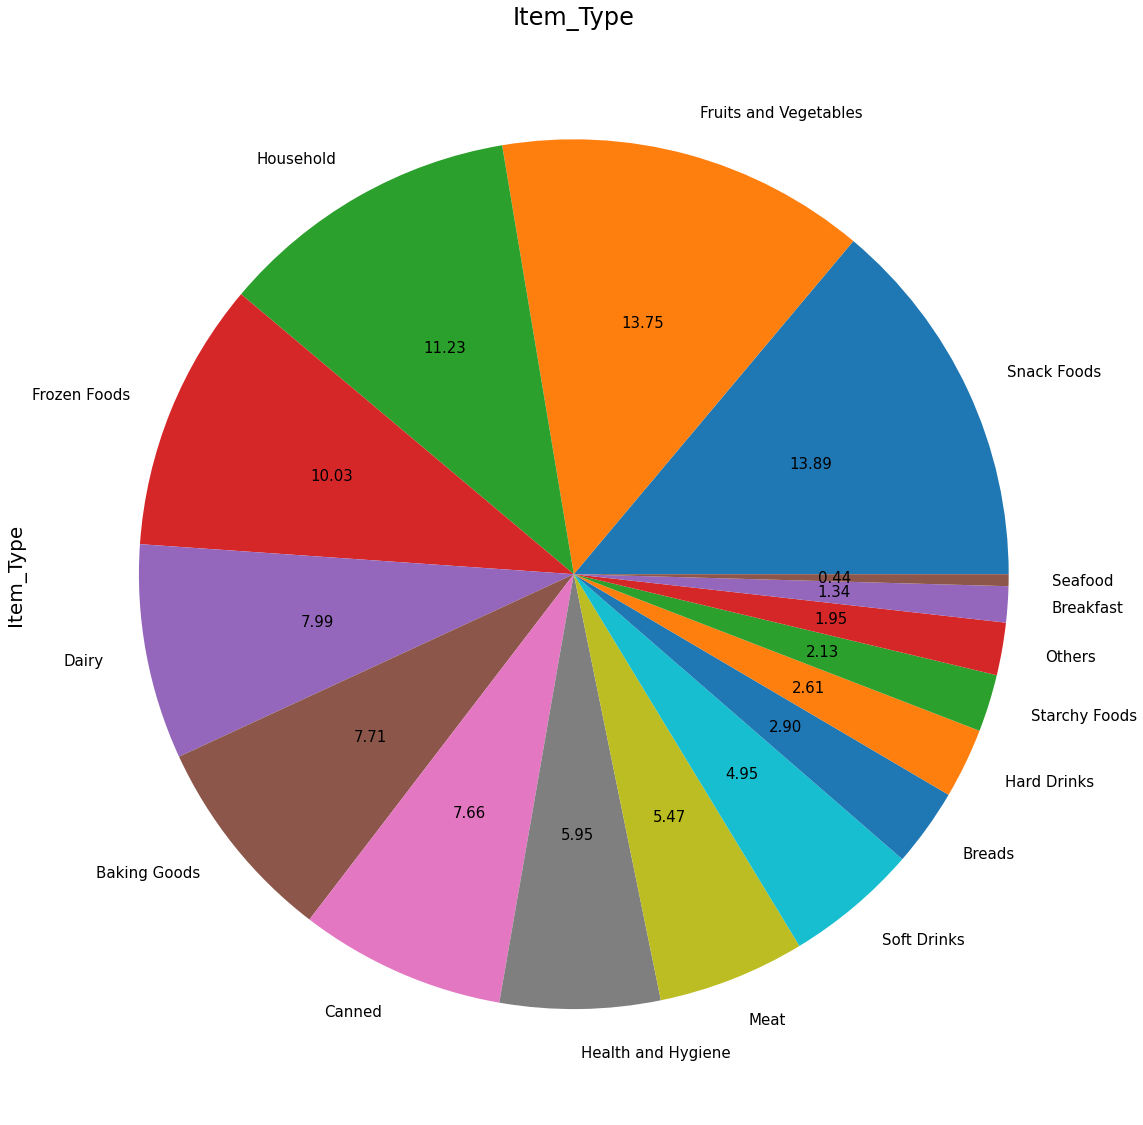

_______________________________________________________________________________________________________________________________


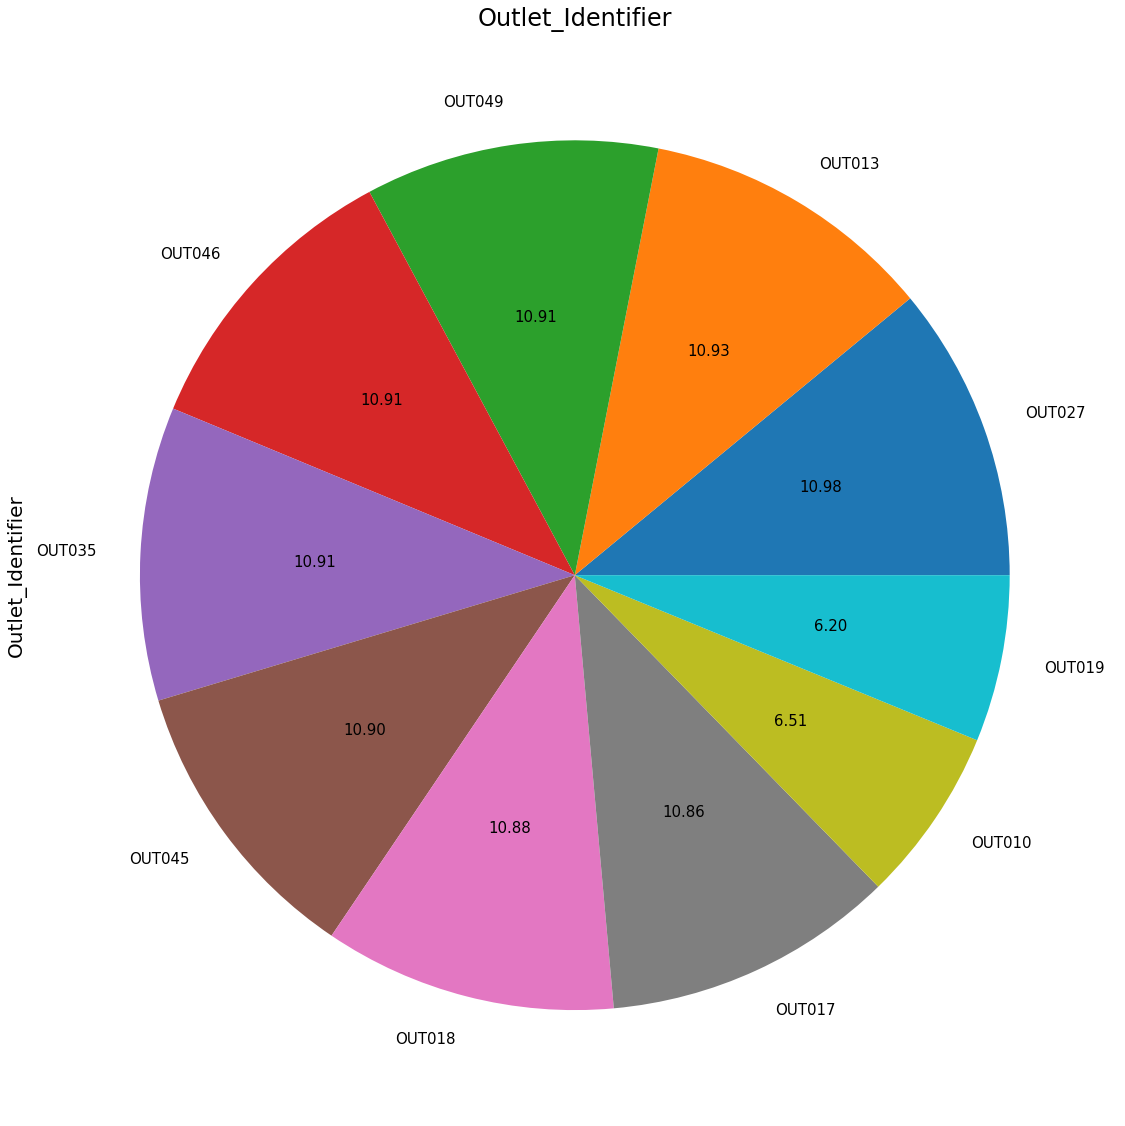

_______________________________________________________________________________________________________________________________


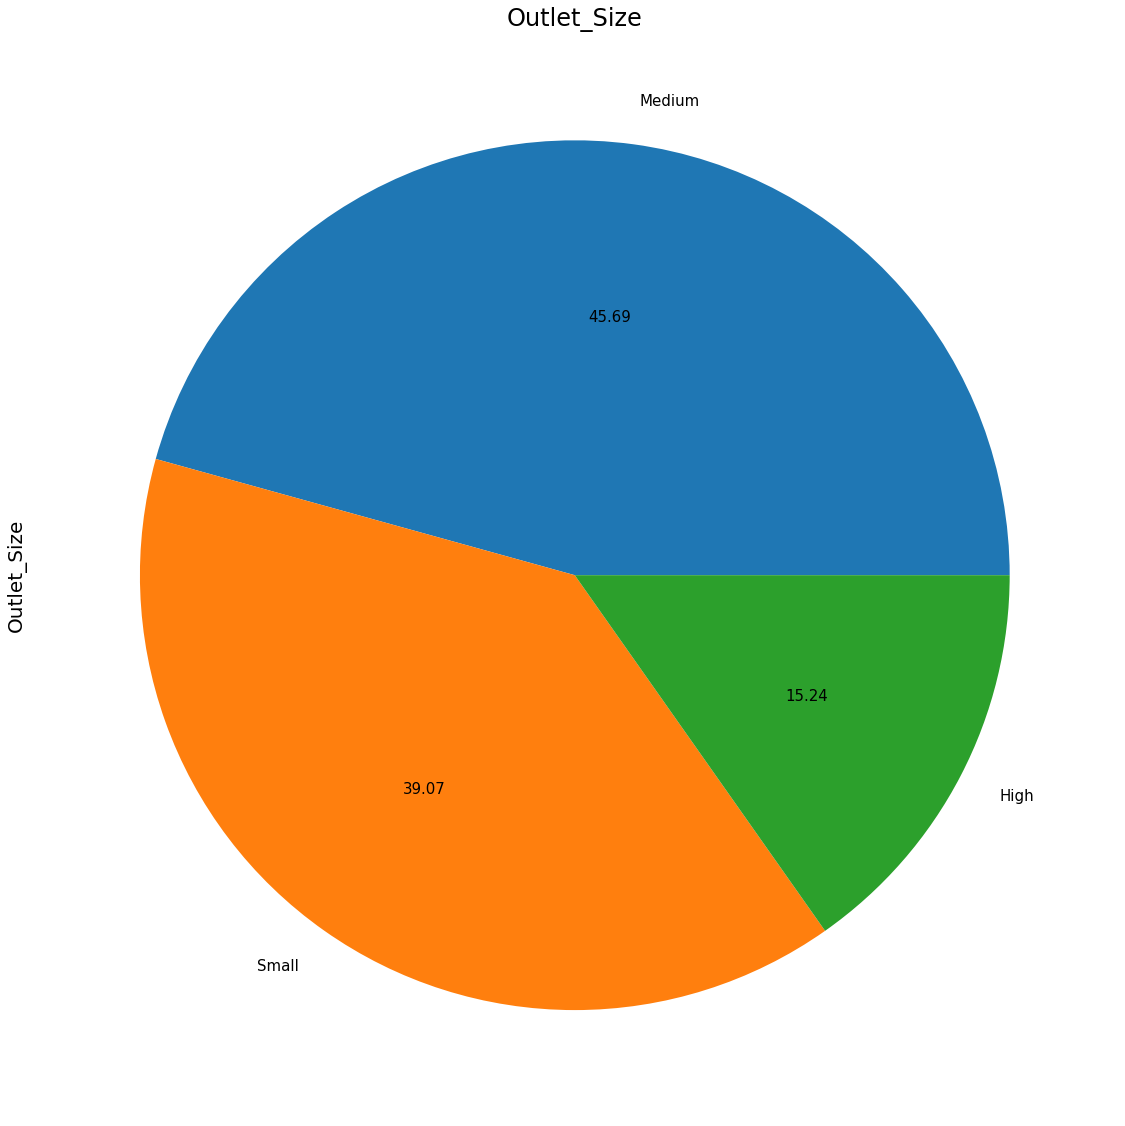

_______________________________________________________________________________________________________________________________


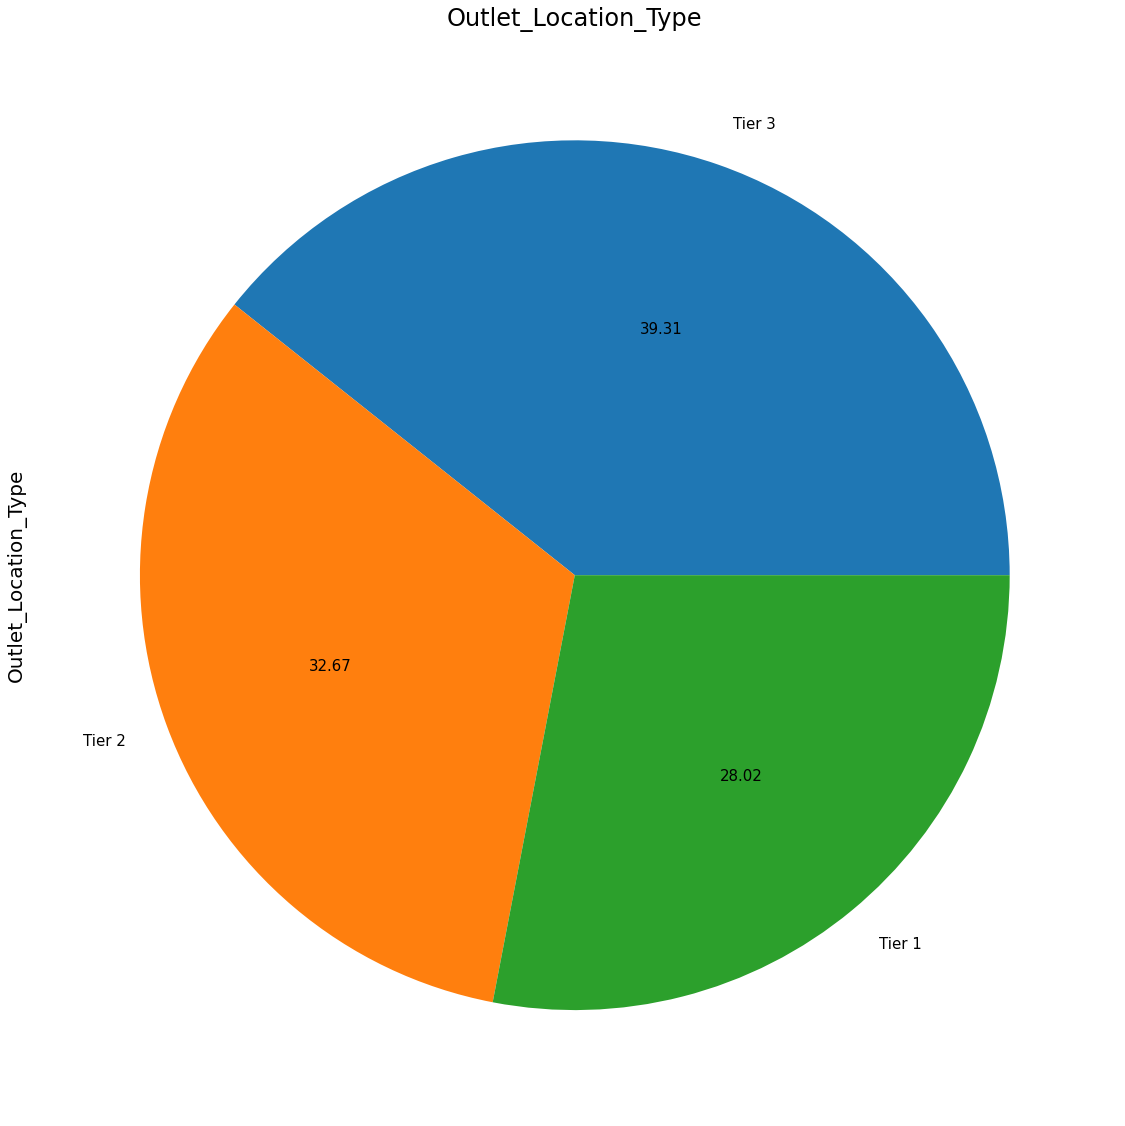

_______________________________________________________________________________________________________________________________


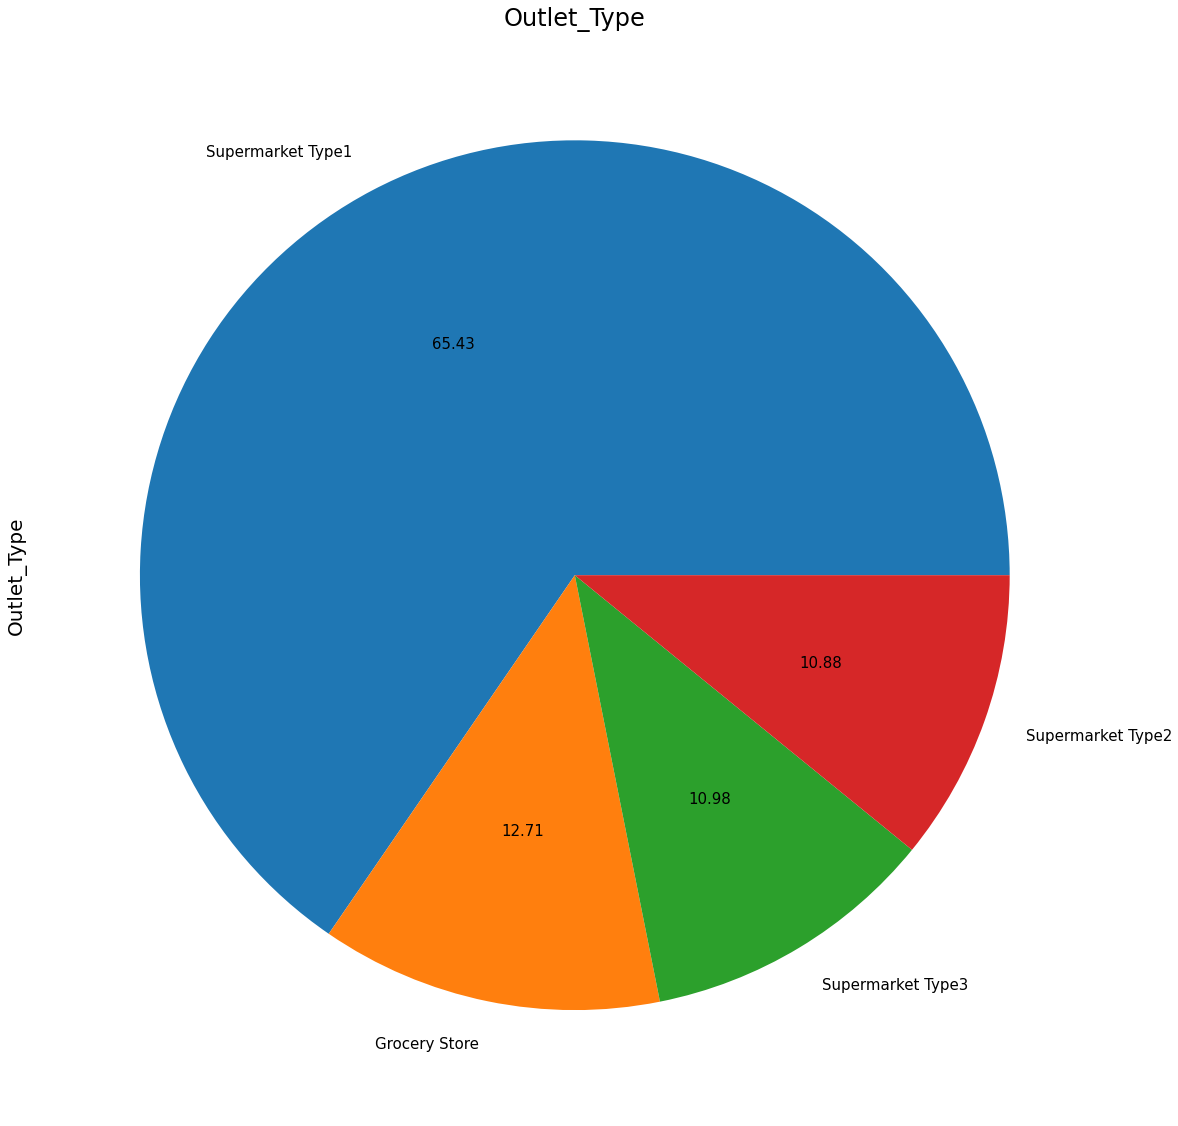

_______________________________________________________________________________________________________________________________


In [21]:
for feature in test_categoric_features: 
    fig = plt.subplots(figsize=(30, 20))
    plt.rcParams.update({'font.size': 20})
    data = df_test[feature].value_counts()
    barplot = data.plot(kind='pie',  title=feature, autopct="%.2f", fontsize=15)
    plt.show()
    print("_______________________________________________________________________________________________________________________________")

### NUMERICAL VALUES ( Test Dataframe )

In [22]:
# To get the nuumerical features in the dataframe 
test_numeric_features = df_test.select_dtypes(include=np.number)
test_numeric_columns= test_numeric_features.columns
test_numeric_features = list(test_numeric_columns) 
print ( " The test dataframe contains 4 numeric features which are : " )
print(test_numeric_features)

 The test dataframe contains 4 numeric features which are : 
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']


In [23]:
# To get the number of unique values in each numerical feature
for feature in test_numeric_features:
    print('The feature is {} and number of unique values are {}'.format(feature,len(df_test[feature].unique())))

The feature is Item_Weight and number of unique values are 411
The feature is Item_Visibility and number of unique values are 5277
The feature is Item_MRP and number of unique values are 4402
The feature is Outlet_Establishment_Year and number of unique values are 9


# Exploratory Data Analysis

In [24]:
df_train.duplicated().sum()

0

In [25]:
df_test.duplicated().sum()

0

> __The train and test datasets don't contain any duplicate values.__ 

### Train dataframe

#### The Boxplot of Each Numerical Feature

In [26]:
# To print all of the 4 quartiles & the lower bound of each feature 
def show_percentiles_and_quartiles(feature):
    Q1=df_train[feature].quantile(0.25)
    Q2=df_train[feature].quantile(0.50)
    Q3=df_train[feature].quantile(0.75)
    IQR=Q3-Q1
    LR=Q1-(IQR*1.5)
    UR=Q3+(IQR*1.5)
    print("The Lower Quartile outlier is: {}".format(LR))
    print("The 25th Percentile is: {}".format(Q1))
    print("The 50th Percentile is: {}".format(Q2))
    print("The 75th Percentile is: {}".format(Q3))
    print("The Upper Quartile outlier is: {}".format(UR))

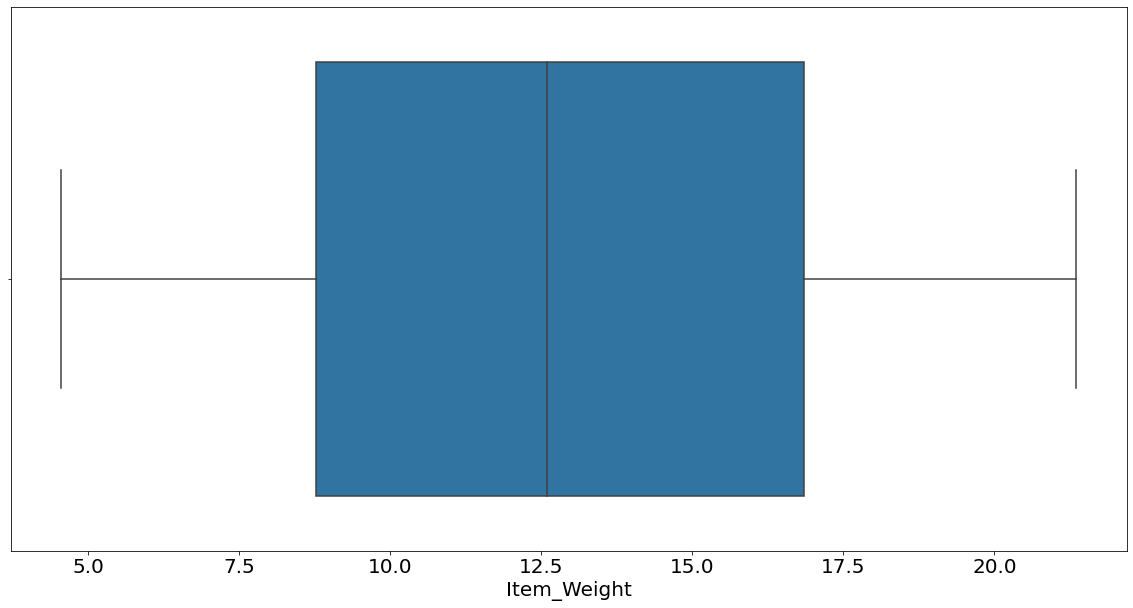

The Lower Quartile outlier is: -3.340625000000003
The 25th Percentile is: 8.77375
The 50th Percentile is: 12.6
The 75th Percentile is: 16.85
The Upper Quartile outlier is: 28.964375000000004
_______________________________________________________________________________________________________________________________


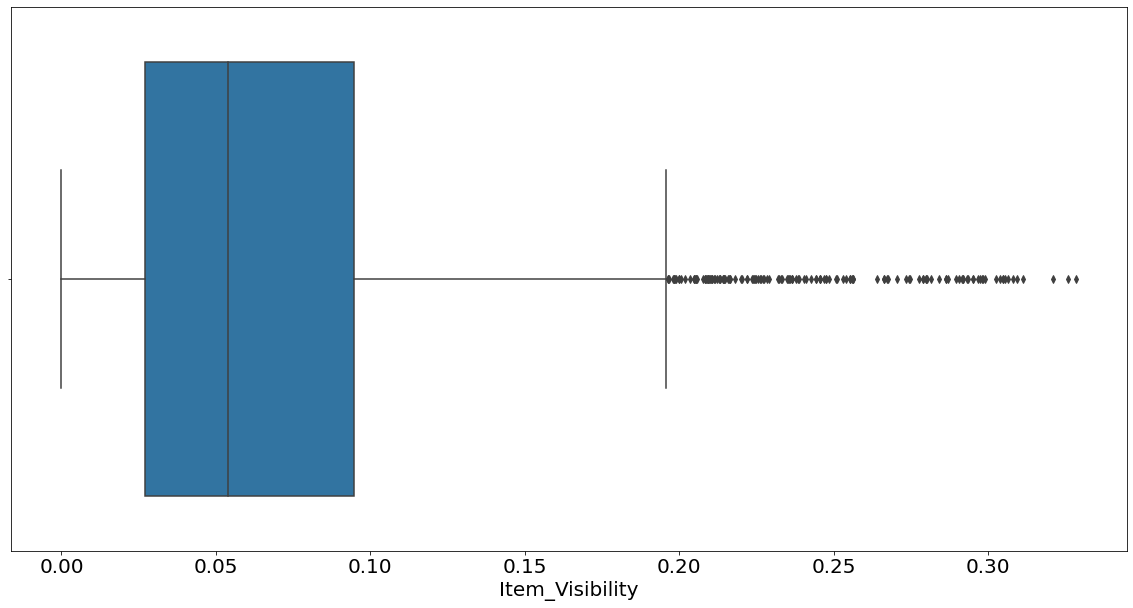

The Lower Quartile outlier is: -0.07440424500000001
The 25th Percentile is: 0.026989477499999998
The 50th Percentile is: 0.05393093400000001
The 75th Percentile is: 0.0945852925
The Upper Quartile outlier is: 0.195979015
_______________________________________________________________________________________________________________________________


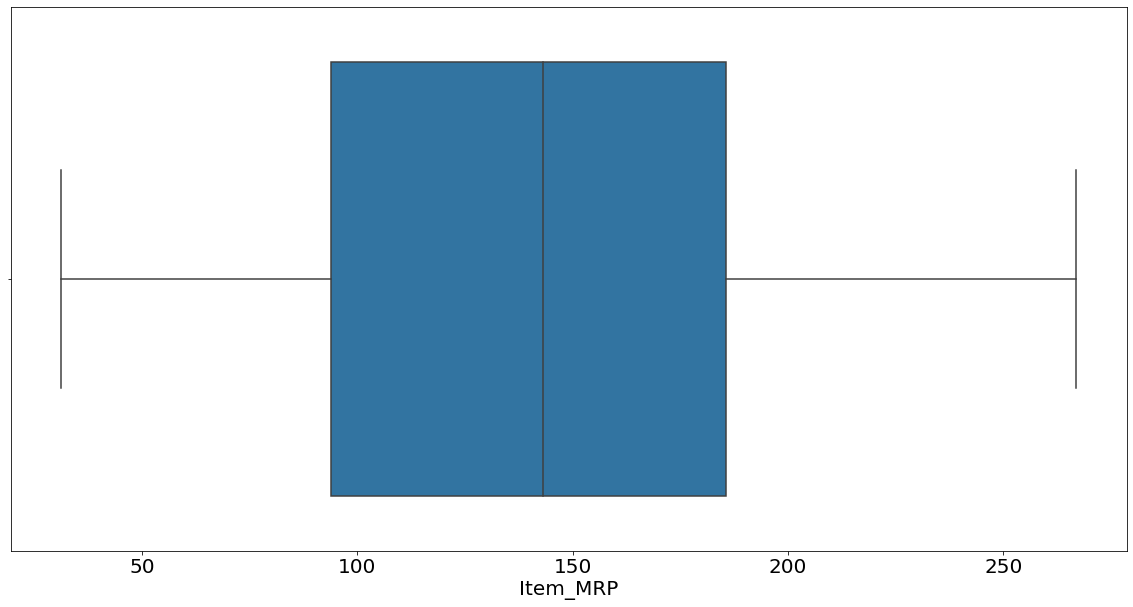

The Lower Quartile outlier is: -43.8993
The 25th Percentile is: 93.8265
The 50th Percentile is: 143.0128
The 75th Percentile is: 185.6437
The Upper Quartile outlier is: 323.3695
_______________________________________________________________________________________________________________________________


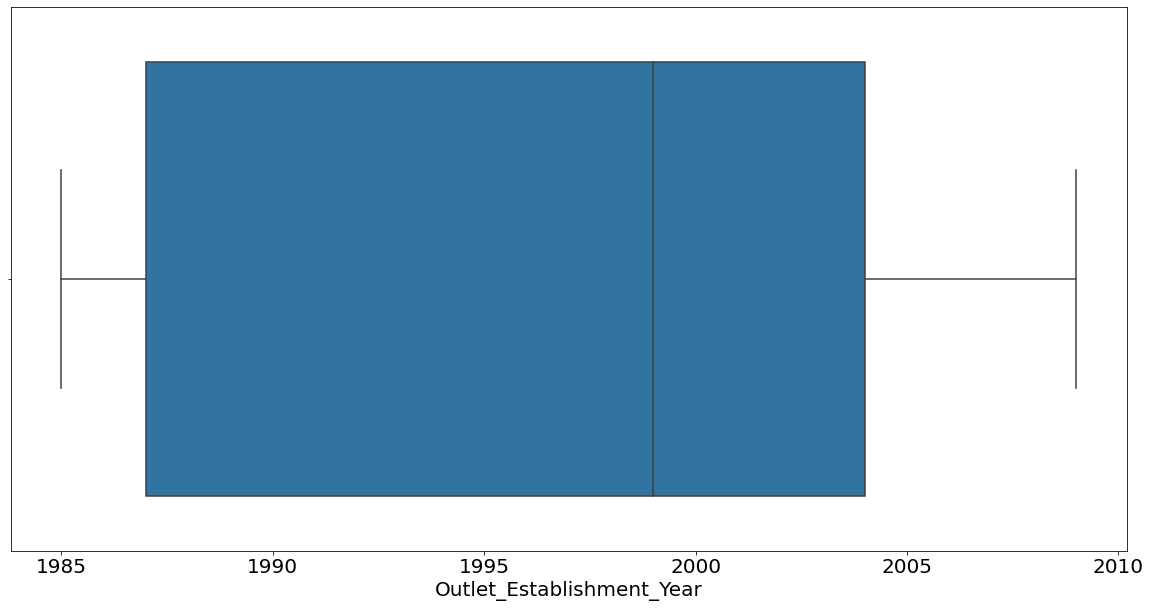

The Lower Quartile outlier is: 1961.5
The 25th Percentile is: 1987.0
The 50th Percentile is: 1999.0
The 75th Percentile is: 2004.0
The Upper Quartile outlier is: 2029.5
_______________________________________________________________________________________________________________________________


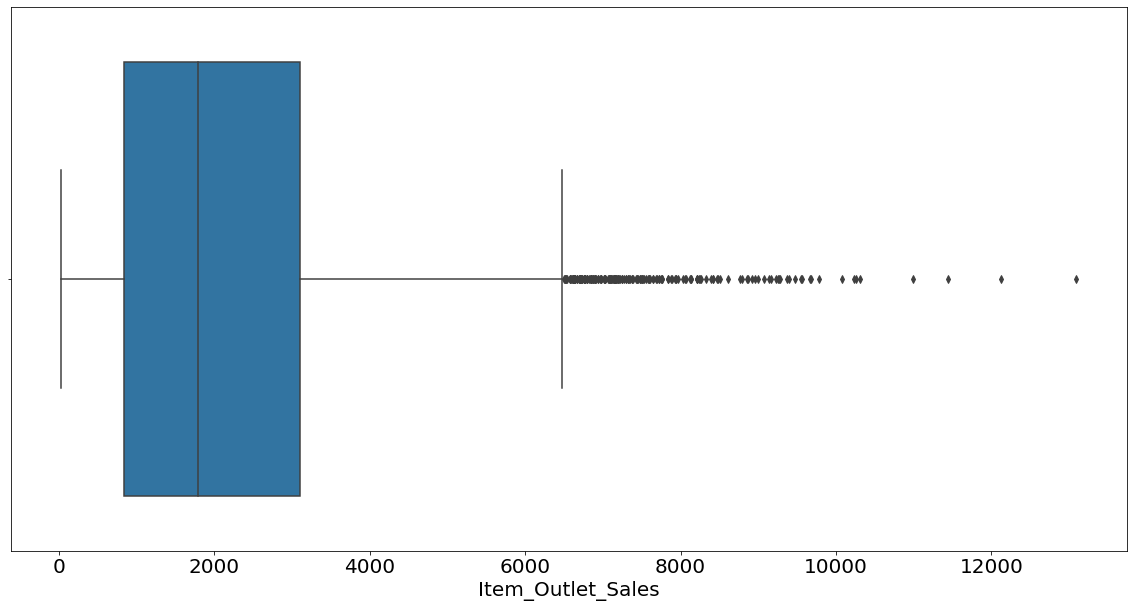

The Lower Quartile outlier is: -2566.3261
The 25th Percentile is: 834.2474
The 50th Percentile is: 1794.3310000000001
The 75th Percentile is: 3101.2964
The Upper Quartile outlier is: 6501.8699
_______________________________________________________________________________________________________________________________


In [27]:
for feature in train_numeric_features:
    fig = plt.subplots(figsize=(20, 10))
    plt.rcParams.update({'font.size': 20})
    sns.boxplot(df_train[feature])
    plt.xlabel(feature)
    plt.show()
    show_percentiles_and_quartiles(feature)
    print("_______________________________________________________________________________________________________________________________")

> __Item_visibility & Item_Outlet_Sales ( the predicted value )  features are the only ones which contains outliers.__

> __Since there are missing values in only Item_Weight ( numerical ) & Outlet_Size ( categorical) features in the train dataframe. Then we can fiil the missing values in the Item_weight feature with mean value.__

In [28]:
# To replace all of the missing values with mean value in the numerical features
df_train.fillna(df_train.mean(numeric_only = True).round(1) , inplace = True )

In [29]:
df_train.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Test dataframe

#### The Boxplot of Each Numerical Feature

In [30]:
# To print all of the 4 quartiles & the lower bound of each feature 
def show_percentiles_and_quartiles(feature):
    Q1=df_test[feature].quantile(0.25)
    Q2=df_test[feature].quantile(0.50)
    Q3=df_test[feature].quantile(0.75)
    IQR=Q3-Q1
    LR=Q1-(IQR*1.5)
    UR=Q3+(IQR*1.5)
    print("The Lower Quartile outlier is: {}".format(LR))
    print("The 25th Percentile is: {}".format(Q1))
    print("The 50th Percentile is: {}".format(Q2))
    print("The 75th Percentile is: {}".format(Q3))
    print("The Upper Quartile outlier is: {}".format(UR))

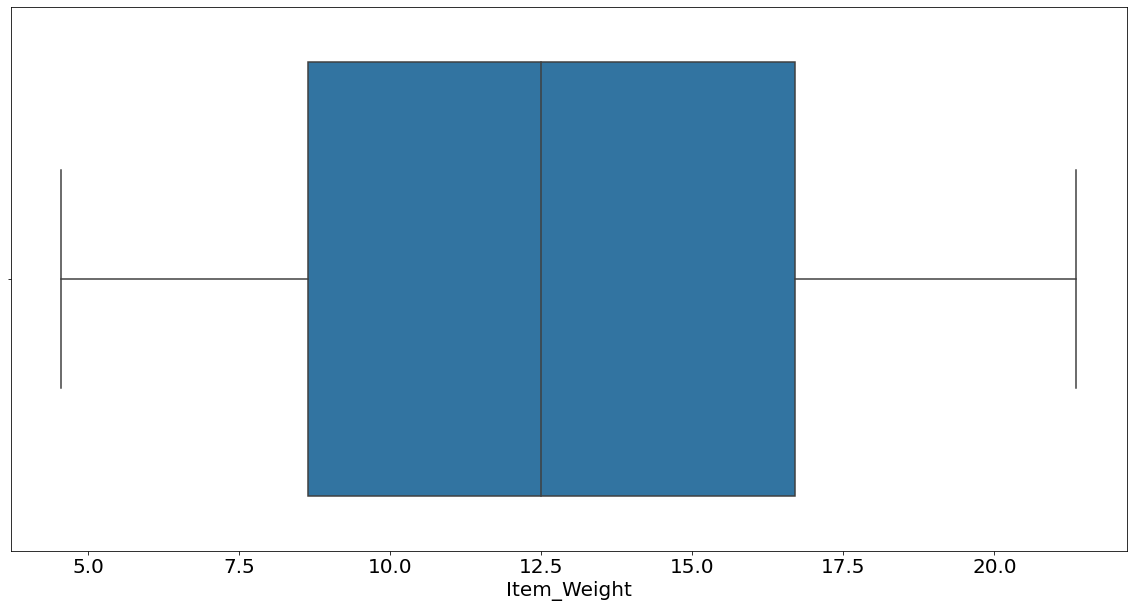

The Lower Quartile outlier is: -3.4375
The 25th Percentile is: 8.645
The 50th Percentile is: 12.5
The 75th Percentile is: 16.7
The Upper Quartile outlier is: 28.7825
_______________________________________________________________________________________________________________________________


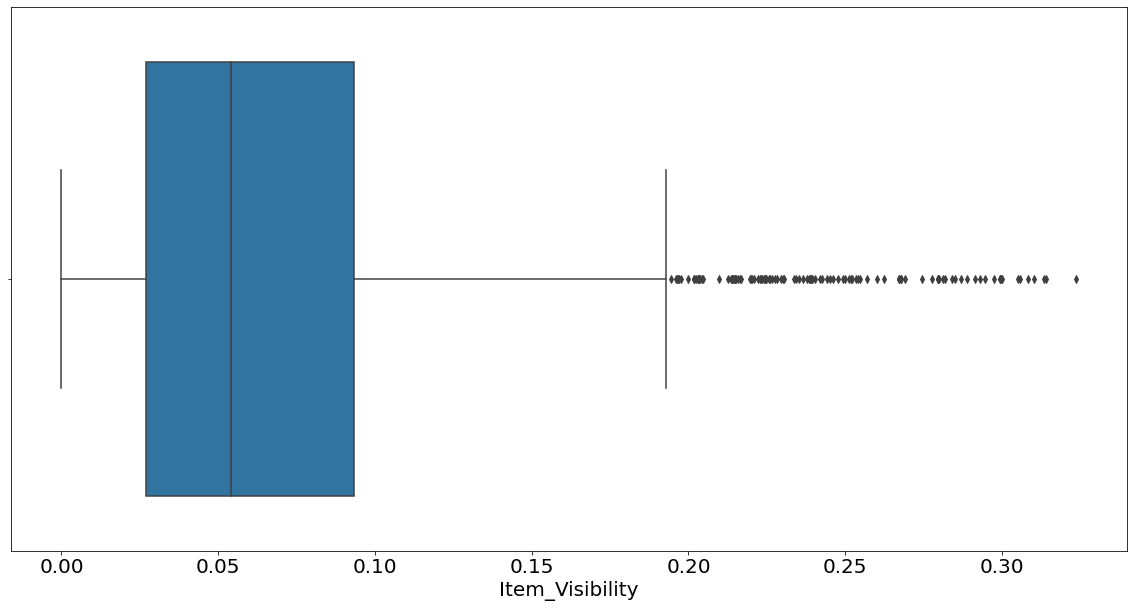

The Lower Quartile outlier is: -0.07257674700000002
The 25th Percentile is: 0.027046875
The 50th Percentile is: 0.054154252
The 75th Percentile is: 0.09346262300000001
The Upper Quartile outlier is: 0.19308624500000005
_______________________________________________________________________________________________________________________________


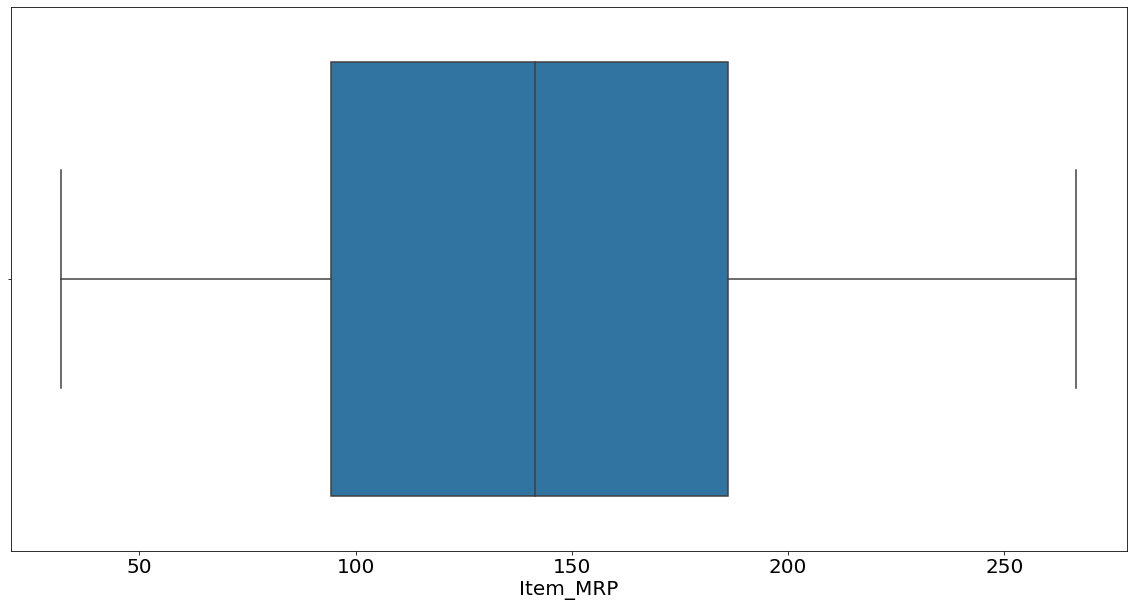

The Lower Quartile outlier is: -43.00989999999999
The 25th Percentile is: 94.412
The 50th Percentile is: 141.4154
The 75th Percentile is: 186.0266
The Upper Quartile outlier is: 323.44849999999997
_______________________________________________________________________________________________________________________________


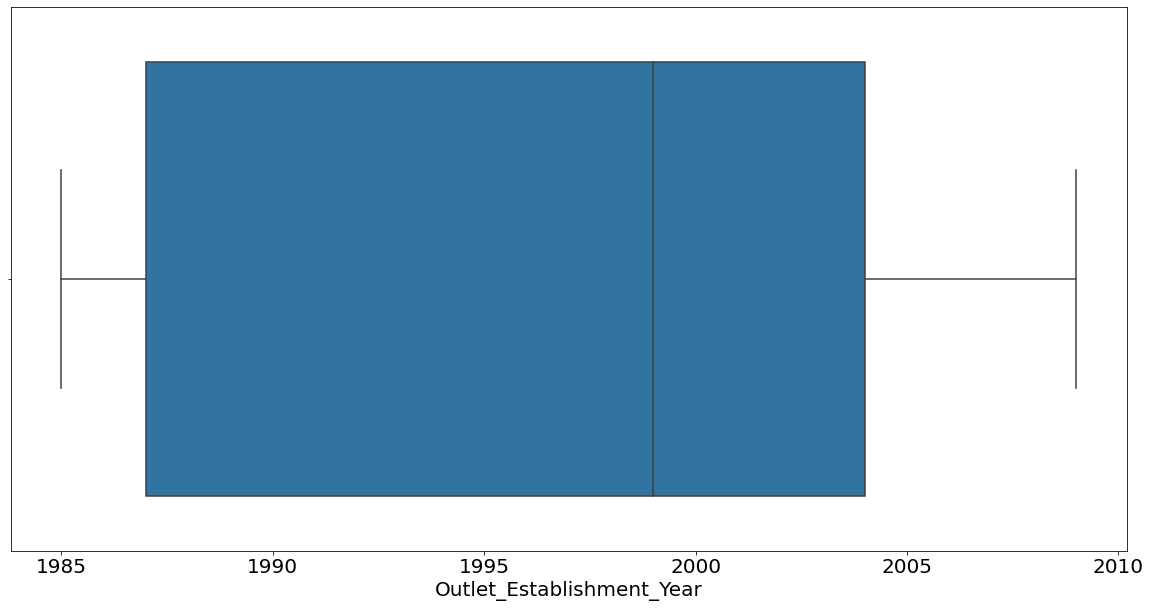

The Lower Quartile outlier is: 1961.5
The 25th Percentile is: 1987.0
The 50th Percentile is: 1999.0
The 75th Percentile is: 2004.0
The Upper Quartile outlier is: 2029.5
_______________________________________________________________________________________________________________________________


In [31]:
for feature in test_numeric_features:
    fig = plt.subplots(figsize=(20, 10))
    plt.rcParams.update({'font.size': 20})
    sns.boxplot(df_test[feature])
    plt.xlabel(feature)
    plt.show()
    show_percentiles_and_quartiles(feature)
    print("_______________________________________________________________________________________________________________________________")

> __Item_visibility feature is the only one which contains outliers.__

> __Since there are missing values in only Item_Weight ( numerical ) & Outlet_Size ( categorical) features in the train dataframe. Then we can fiil the missing values in the Item_weight feature with mean value.__

In [32]:
# To replace all of the missing values with mean value in the numerical features
df_test.fillna(df_test.mean(numeric_only = True).round(1) , inplace = True )

In [33]:
df_test.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# Univariate Analysis

# Train dataset

In [34]:
# The counts of each categorical feature 
for feature in train_categoric_features : 
    print("The counts of the catagorical values in the '{}' feature:\n".format(feature.title()))
    print(df_train[feature].value_counts().sort_index())
    print("_______________________________________________________________________________________________________________________________")

The counts of the catagorical values in the 'Item_Identifier' feature:

DRA12    6
DRA24    7
DRA59    8
DRB01    3
DRB13    5
        ..
NCZ30    7
NCZ41    5
NCZ42    5
NCZ53    5
NCZ54    7
Name: Item_Identifier, Length: 1559, dtype: int64
_______________________________________________________________________________________________________________________________
The counts of the catagorical values in the 'Item_Fat_Content' feature:

LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
Name: Item_Fat_Content, dtype: int64
_______________________________________________________________________________________________________________________________
The counts of the catagorical values in the 'Item_Type' feature:

Baking Goods              648
Breads                    251
Breakfast                 110
Canned                    649
Dairy                     682
Frozen Foods              856
Fruits and Vegetables    1232
Hard Drinks               214
Healt

In [35]:
# The counts of each numerical feature 
for feature in train_numeric_features: 
    print("The counts of the values in the '{}' feature:\n".format(feature.title()))
    print(df_train[feature].value_counts().sort_index())
    print("_______________________________________________________________________________________________________________________________")

The counts of the values in the 'Item_Weight' feature:

4.555      4
4.590      5
4.610      7
4.615      4
4.635      5
          ..
21.000     6
21.100    17
21.200     5
21.250    24
21.350     7
Name: Item_Weight, Length: 416, dtype: int64
_______________________________________________________________________________________________________________________________
The counts of the values in the 'Item_Visibility' feature:

0.000000    526
0.003575      1
0.003589      1
0.003598      1
0.003599      1
           ... 
0.309390      1
0.311090      1
0.321115      1
0.325781      1
0.328391      1
Name: Item_Visibility, Length: 7880, dtype: int64
_______________________________________________________________________________________________________________________________
The counts of the values in the 'Item_Mrp' feature:

31.2900     1
31.4900     1
31.8900     1
31.9558     2
32.0558     1
           ..
266.1884    2
266.2884    1
266.5884    2
266.6884    2
266.8884    2
Name: I

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019040870070>,
      dtype=object)

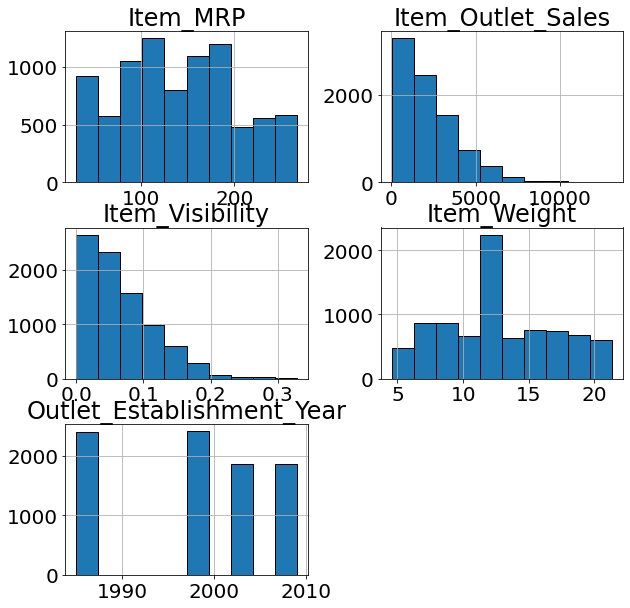

In [36]:
# To draw a histogrm for all of the numerical features 
df_train.hist(figsize=(10,10),bins=10 , edgecolor='black')

# Bivariate Analysis

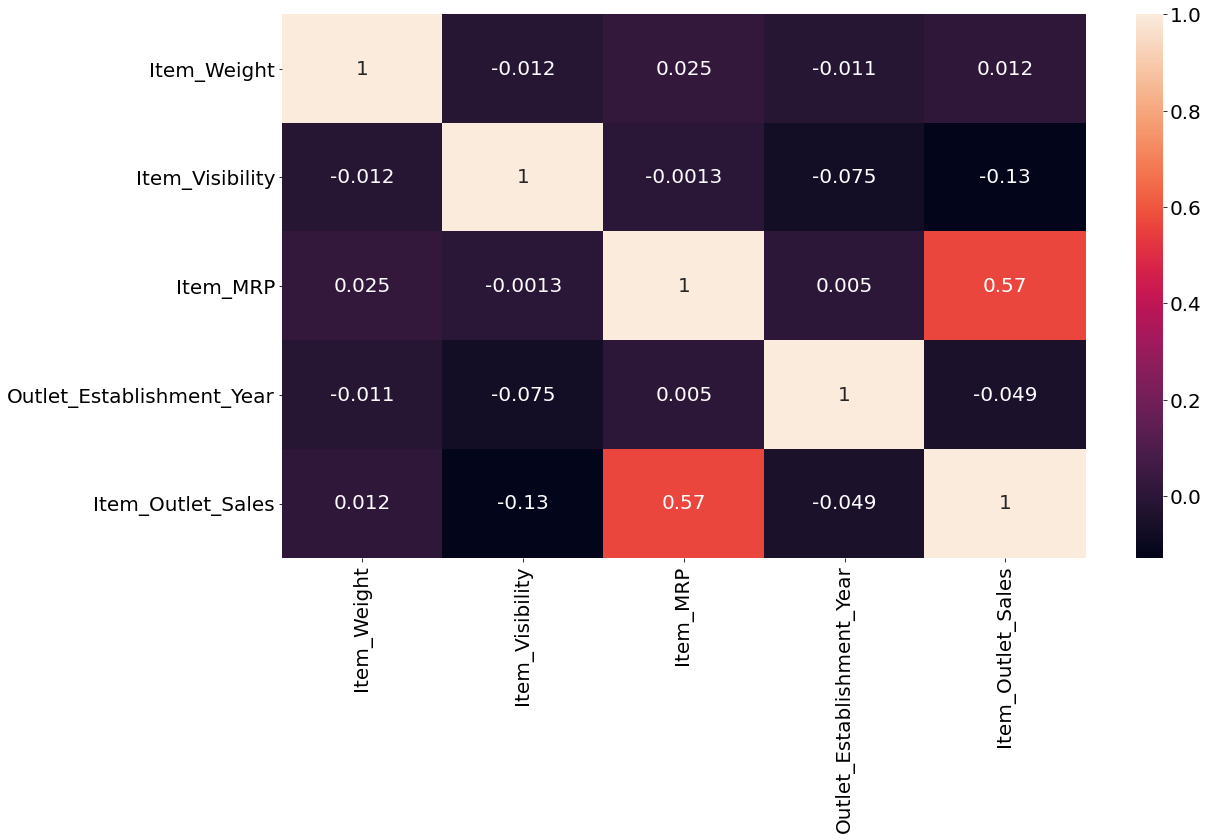

In [37]:
#To find the correlation between the features
fig = plt.figure(figsize=(18,10))
corr_matt=df_train.corr()
sns.heatmap(corr_matt,annot=True)

> __There is no _high_ _correlation_ , hence we don't want to remove any attributes from the data .__

> __Positive Correlation :__
- Item_Weight : Item_MRP , Item_Outlet_Sales ( predicted value ) 
- Item_MRP : Item_Weight , Outlet_Establishment_Year ,  Item_Outlet_Sales ( predicted value ) 
- Outlet_Establishment_Year : Item_MRP
- Item_Outlet_Sales ( predicted value ) : Item_Weight , Item_MRP


> __Negative Correlation :__
- Item_Weight : Item_Visibility , Outlet_Establishment_Year
- Item_Visibility : Item_Weight ,  Item_MRP , Outlet_Establishment_Year , Item_Outlet_Sales ( predicted value ) 
- Item_MRP : Item_Visibility
- Outlet_Establishment_Year : Item_Weight  , Item_Visibility , Outlet_Establishment_Year , Item_Outlet_Sales ( predicted value ) 
- Item_Outlet_Sales ( predicted value ) : Item_Visibility , Outlet_Establishment_Year 

# Test Dataset

In [38]:
# The counts of each categorical feature 
for feature in test_categoric_features : 
    print("The counts of the catagorical values in the '{}' feature:\n".format(feature.title()))
    print(df_test[feature].value_counts().sort_index())
    print("_______________________________________________________________________________________________________________________________")

The counts of the catagorical values in the 'Item_Identifier' feature:

DRA12    3
DRA24    3
DRA59    2
DRB01    5
DRB13    4
        ..
NCZ30    3
NCZ41    3
NCZ42    5
NCZ53    4
NCZ54    3
Name: Item_Identifier, Length: 1543, dtype: int64
_______________________________________________________________________________________________________________________________
The counts of the catagorical values in the 'Item_Fat_Content' feature:

LF          206
Low Fat    3396
Regular    1935
low fat      66
reg          78
Name: Item_Fat_Content, dtype: int64
_______________________________________________________________________________________________________________________________
The counts of the catagorical values in the 'Item_Type' feature:

Baking Goods             438
Breads                   165
Breakfast                 76
Canned                   435
Dairy                    454
Frozen Foods             570
Fruits and Vegetables    781
Hard Drinks              148
Health and Hy

In [39]:
# The count of numerical features in test dataset
for feature in test_numeric_features: 
    print("The counts of the values in the '{}' feature:\n".format(feature.title()))
    print(df_test[feature].value_counts().sort_index())
    print("_______________________________________________________________________________________________________________________________")

The counts of the values in the 'Item_Weight' feature:

4.555      3
4.590      2
4.610      1
4.615      2
4.635      2
          ..
21.000     2
21.100    13
21.200    10
21.250    12
21.350     9
Name: Item_Weight, Length: 411, dtype: int64
_______________________________________________________________________________________________________________________________
The counts of the values in the 'Item_Visibility' feature:

0.000000    353
0.003591      1
0.003592      1
0.005256      1
0.005470      1
           ... 
0.308259      1
0.310377      1
0.313542      1
0.313935      1
0.323637      1
Name: Item_Visibility, Length: 5277, dtype: int64
_______________________________________________________________________________________________________________________________
The counts of the values in the 'Item_Mrp' feature:

31.9900     1
32.0558     1
32.0900     1
32.3900     3
32.4558     1
           ..
266.0884    1
266.2226    1
266.3226    1
266.4884    1
266.5884    1
Name: I

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000190440B41F0>,
      dtype=object)

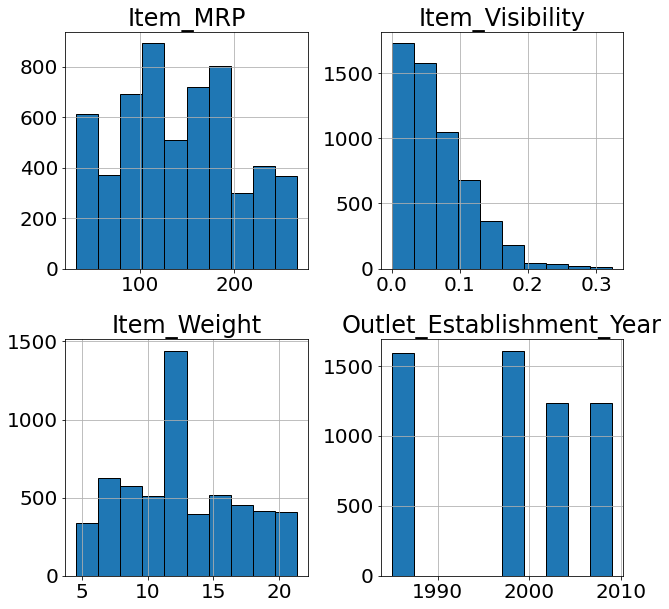

In [40]:
# To draw a histogrm for all of the numerical features 
df_test.hist(figsize=(10,10),bins=10 , edgecolor='black')

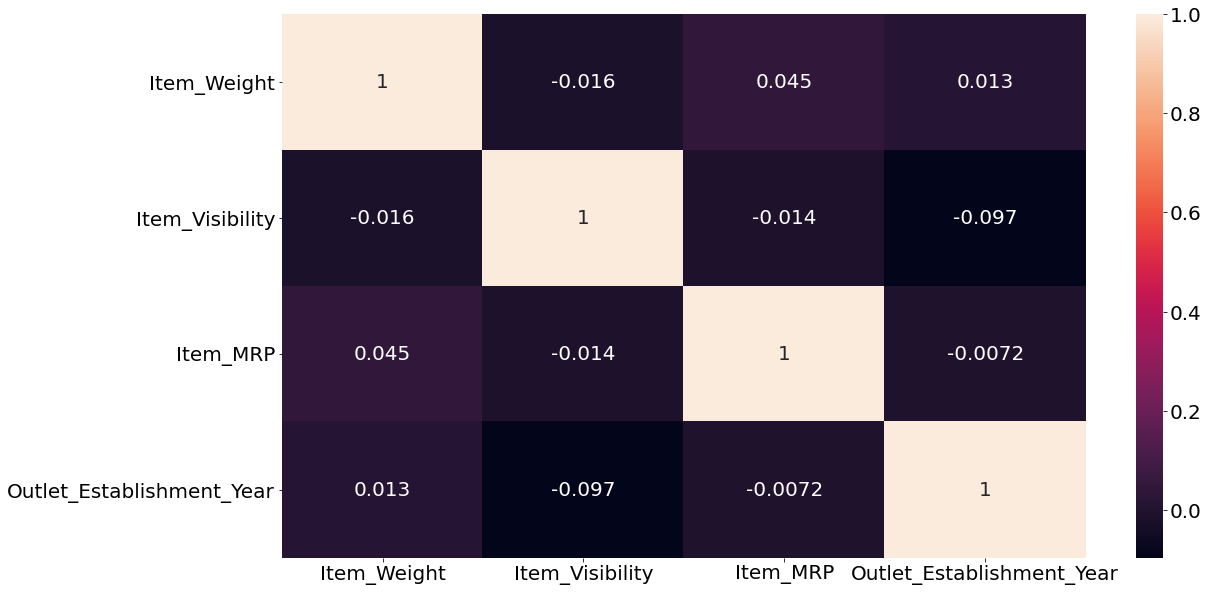

In [41]:
#To find the correlation between the features
fig = plt.figure(figsize=(18,10))
corr_matt=df_test.corr()
sns.heatmap(corr_matt,annot=True)

> __There is no _high_ _correlation_ , hence we don't want to remove any attributes from the data .__

> __Positive Correlation :__
- Item_Weight : Item_MRP , Outlet_Establishment_Year
- Item_MRP : Item_Weight 
- Outlet_Establishment_Year : Item_MRP ,Item_Weight



> __Negative Correlation :__
- Item_Weight : Item_Visibility 
- Item_Visibility : Item_Weight ,  Item_MRP , Outlet_Establishment_Year 
- Item_MRP : Item_Visibility  ,  Outlet_Establishment_Year
- Outlet_Establishment_Year : Item_Visibility ,  Item_MRP

# Feature Engineering 

> __Firstly the missing values were filled with mean value in both datasets.__

> __Secondly the label encoding will be used to change the categorical values to numerical values.__

## Label Encoding

> __As it was obvious from the count , pie plots , there are repeated categories with same name but different way of writing.__

> __So they will be the same category in label encoding.__

> __The Item_identifier , Outlet_Identifier features will not be encoded as it doesn't affect the predeiction.__

In [42]:
train_label_encoder = preprocessing.LabelEncoder()
df_train['Item_Fat_Content']= train_label_encoder.fit_transform(df_train['Item_Fat_Content'])
df_train['Item_Type']= train_label_encoder.fit_transform(df_train['Item_Type'])
df_train['Outlet_Size']= train_label_encoder.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type']= train_label_encoder.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type']= train_label_encoder.fit_transform(df_train['Outlet_Type'])

In [43]:
df_train.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0           FDA15         9.30                 1         0.016047          4   
1           DRC01         5.92                 2         0.019278         14   
2           FDN15        17.50                 1         0.016760         10   
3           FDX07        19.20                 2         0.000000          6   
4           NCD19         8.93                 1         0.000000          9   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092            OUT049                       1999            1   
1   48.2692            OUT018                       2009            1   
2  141.6180            OUT049                       1999            1   
3  182.0950            OUT010                       1998            3   
4   53.8614            OUT013                       1987            0   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
0                     0            1          3735.1380  
1                     2            2           443.4228  
2                     0            1          2097.2700  
3                     2            0           732.3800  
4                     2            1           994.7052

In [44]:
# Correlation of features w.r.t target label

corr_matt1 = df_train.corr()['Item_Outlet_Sales']
corr_matt1

Item_Weight                  0.011855
Item_Fat_Content             0.009800
Item_Visibility             -0.128625
Item_Type                    0.017048
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Outlet_Size                 -0.172477
Outlet_Location_Type         0.089367
Outlet_Type                  0.401522
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [45]:
# Label encoding for categorical features in test dataset
test_label_encoder = preprocessing.LabelEncoder()
df_test['Item_Fat_Content']= test_label_encoder.fit_transform(df_test['Item_Fat_Content'])
df_test['Item_Type']= test_label_encoder.fit_transform(df_test['Item_Type'])
df_test['Outlet_Size']= test_label_encoder.fit_transform(df_test['Outlet_Size'])
df_test['Outlet_Location_Type']= test_label_encoder.fit_transform(df_test['Outlet_Location_Type'])
df_test['Outlet_Type']= test_label_encoder.fit_transform(df_test['Outlet_Type'])

In [46]:
df_test.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0           FDW58       20.750                 1         0.007565         13   
1           FDW14        8.300                 4         0.038428          4   
2           NCN55       14.600                 1         0.099575         11   
3           FDQ58        7.315                 1         0.015388         13   
4           FDY38       12.700                 2         0.118599          4   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  107.8622            OUT049                       1999            1   
1   87.3198            OUT017                       2007            3   
2  241.7538            OUT010                       1998            3   
3  155.0340            OUT017                       2007            3   
4  234.2300            OUT027                       1985            1   

   Outlet_Location_Type  Outlet_Type  
0                     0            1  
1                     1            1  
2                     2            0  
3                     1            1  
4                     2            3

# Data Preprocessing

> __The missing values are replaced with the mean values.__

> __There is no duplicate values in both datasets.__ 

In [47]:
# The Item_Identifier , Outlet_Identifier features will be dropped as they don't affect the predicted value
df_train.drop(["Item_Identifier"] , axis = 1 , inplace = True )
df_train.drop(["Outlet_Identifier"] , axis = 1 , inplace = True )
df_train.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0         9.30                 1         0.016047          4  249.8092   
1         5.92                 2         0.019278         14   48.2692   
2        17.50                 1         0.016760         10  141.6180   
3        19.20                 2         0.000000          6  182.0950   
4         8.93                 1         0.000000          9   53.8614   

   Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0                       1999            1                     0            1   
1                       2009            1                     2            2   
2                       1999            1                     0            1   
3                       1998            3                     2            0   
4                       1987            0                     2            1   

   Item_Outlet_Sales  
0          3735.1380  
1           443.4228  
2          2097.2700  
3           732.3800  
4           994.7052

In [48]:
# The Item_Identifier , Outlet_Identifier features will be dropped as they don't affect the predicted value
df_test.drop(["Item_Identifier"] , axis = 1 , inplace = True )
df_test.drop(["Outlet_Identifier"] , axis = 1 , inplace = True )
df_test.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0       20.750                 1         0.007565         13  107.8622   
1        8.300                 4         0.038428          4   87.3198   
2       14.600                 1         0.099575         11  241.7538   
3        7.315                 1         0.015388         13  155.0340   
4       12.700                 2         0.118599          4  234.2300   

   Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type  
0                       1999            1                     0            1  
1                       2007            3                     1            1  
2                       1998            3                     2            0  
3                       2007            3                     1            1  
4                       1985            1                     2            3

# Modelling

### Linear Regression

In [49]:
y = df_train.Item_Outlet_Sales
x = df_train.drop(['Item_Outlet_Sales'],axis = 1)
x.shape ,y.shape  

((8523, 9), (8523,))

In [50]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

## Test the model 

In [51]:
model.predict(df_test)

array([1840.6882084 , 1303.65867319, 2280.40601069, ..., 1629.98247662,
       3280.90622602, 1007.66333384])